## 0. Introduction to Santander Product Recommendation

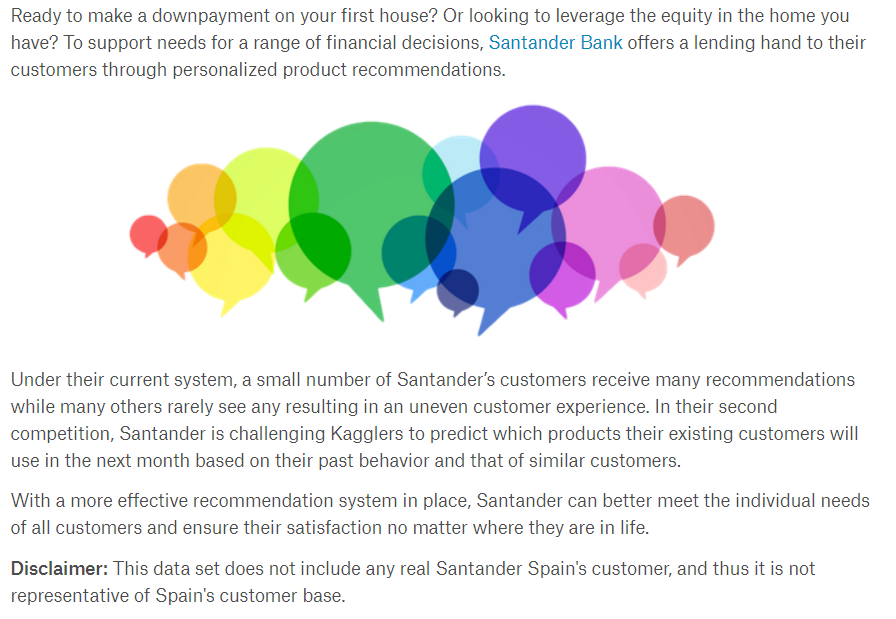

In [1]:
from IPython.display import Image
Image("Santander Product Recommendation_Kaggle.png")

## 1. Library

In [120]:
import numpy as np 
import pandas as pd
import random 

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
# Jupyter Notebook 내부에 그래프 출력하도록 설정
import seaborn as sns


from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

import xgboost as xgb


import sys
import os
print(os.listdir())

['.ipynb_checkpoints', 'sample_submission.csv', 'Santander Product Recommendation_Kaggle.ipynb', 'Santander Product Recommendation_Kaggle.png', 'test_random_sampling_0.0001%.csv', 'train_random_sampling_0.0001%.csv']


## 2. Road Data

In [3]:
#filename = "../train_ver2.csv"
#n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
#s = int(n * 0.001) #desired sample size
#skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list

#df_train = pd.read_csv(filename, skiprows=skip)
#df_test = pd.read_csv(filename, skiprows=skip)

df_train = pd.read_csv("train_random_sampling_0.0001%.csv", encoding = 'ms949', engine = 'python')
df_test = pd.read_csv("test_random_sampling_0.0001%.csv", encoding = 'ms949', engine = 'python')

In [4]:
df_train.shape, df_test.shape

((1364, 48), (96, 24))

In [5]:
submission = pd.read_csv("sample_submission.csv")

In [6]:
submission # 상위 7개 제품을 공백을 줘서 작성하여 제출하면 됨

ncodpers     added_products
0          15889  ind_tjcr_fin_ult1
1          15890  ind_tjcr_fin_ult1
2          15892  ind_tjcr_fin_ult1
3          15893  ind_tjcr_fin_ult1
4          15894  ind_tjcr_fin_ult1
5          15895  ind_tjcr_fin_ult1
6          15896  ind_tjcr_fin_ult1
7          15897  ind_tjcr_fin_ult1
8          15898  ind_tjcr_fin_ult1
9          15899  ind_tjcr_fin_ult1
10         15900  ind_tjcr_fin_ult1
11         15901  ind_tjcr_fin_ult1
12         15902  ind_tjcr_fin_ult1
13         15903  ind_tjcr_fin_ult1
14         15906  ind_tjcr_fin_ult1
15         15907  ind_tjcr_fin_ult1
16         15908  ind_tjcr_fin_ult1
17         15910  ind_tjcr_fin_ult1
18         15911  ind_tjcr_fin_ult1
19         15913  ind_tjcr_fin_ult1
20         15914  ind_tjcr_fin_ult1
21         15915  ind_tjcr_fin_ult1
22         15916  ind_tjcr_fin_ult1
23         15917  ind_tjcr_fin_ult1
24         15918  ind_tjcr_fin_ult1
25         15919  ind_tjcr_fin_ult1
26         15920  ind_tjcr_fin_ult1
27         15921  ind_tjcr_fin_ult1
28         15922  ind_tjcr_fin_ult1
29         15923  ind_tjcr_fin_ult1
...          ...                ...
929585   1553654  ind_tjcr_fin_ult1
929586   1553655  ind_tjcr_fin_ult1
929587   1553656  ind_tjcr_fin_ult1
929588   1553657  ind_tjcr_fin_ult1
929589   1553658  ind_tjcr_fin_ult1
929590   1553660  ind_tjcr_fin_ult1
929591   1553661  ind_tjcr_fin_ult1
929592   1553662  ind_tjcr_fin_ult1
929593   1553663  ind_tjcr_fin_ult1
929594   1553664  ind_tjcr_fin_ult1
929595   1553665  ind_tjcr_fin_ult1
929596   1553667  ind_tjcr_fin_ult1
929597   1553668  ind_tjcr_fin_ult1
929598   1553669  ind_tjcr_fin_ult1
929599   1553670  ind_tjcr_fin_ult1
929600   1553672  ind_tjcr_fin_ult1
929601   1553673  ind_tjcr_fin_ult1
929602   1553675  ind_tjcr_fin_ult1
929603   1553676  ind_tjcr_fin_ult1
929604   1553677  ind_tjcr_fin_ult1
929605   1553679  ind_tjcr_fin_ult1
929606   1553680  ind_tjcr_fin_ult1
929607   1553681  ind_tjcr_fin_ult1
929608   1553683  ind_tjcr_fin_ult1
929609   1553684  ind_tjcr_fin_ult1
929610   1553685  ind_tjcr_fin_ult1
929611   1553686  ind_tjcr_fin_ult1
929612   1553687  ind_tjcr_fin_ult1
929613   1553688  ind_tjcr_fin_ult1
929614   1553689  ind_tjcr_fin_ult1

[929615 rows x 2 columns]

## 3. EDA

### 1) Check Data Set

In [7]:
pd.options.display.max_columns = 50

In [8]:
df_train.head()

fecha_dato  ncodpers ind_empleado pais_residencia sexo   age  fecha_alta  \
0  2015-01-28   1055198            N              ES    V  32.0  2012-08-31   
1  2015-01-28   1048106            N              ES    V  23.0  2012-08-09   
2  2015-01-28   1027002            N              ES    H  25.0  2012-07-20   
3  2015-01-28   1098575            N              ES    V  29.0  2012-11-12   
4  2015-01-28   1127288            N              ES    H  41.0  2013-04-09   

   ind_nuevo  antiguedad  indrel ult_fec_cli_1t  indrel_1mes tiprel_1mes  \
0        0.0        34.0     1.0            NaN          1.0           A   
1        0.0        35.0     1.0            NaN          1.0           I   
2        0.0        36.0     1.0            NaN          1.0           I   
3        0.0        32.0     1.0            NaN          1.0           I   
4        0.0        27.0     1.0            NaN          1.0           A   

  indresi indext conyuemp canal_entrada indfall  tipodom  cod_prov  \
0       S      N      NaN           KFC       N      1.0      38.0   
1       S      N      NaN           KHE       N      1.0      50.0   
2       S      N      NaN           KHE       N      1.0      21.0   
3       S      N      NaN           KHE       N      1.0      46.0   
4       S      N      NaN           KFC       N      1.0       1.0   

                  nomprov  ind_actividad_cliente      renta  \
0  SANTA CRUZ DE TENERIFE                    1.0   65166.54   
1                ZARAGOZA                    0.0  169512.51   
2                  HUELVA                    0.0        NaN   
3                VALENCIA                    0.0        NaN   
4                   ALAVA                    1.0        NaN   

             segmento  ind_ahor_fin_ult1  ind_aval_fin_ult1  ind_cco_fin_ult1  \
0   02 - PARTICULARES                  0                  0                 0   
1  03 - UNIVERSITARIO                  0                  0                 1   
2  03 - UNIVERSITARIO                  0                  0                 1   
3  03 - UNIVERSITARIO                  0                  0                 1   
4   02 - PARTICULARES                  0                  0                 0   

   ind_cder_fin_ult1  ind_cno_fin_ult1  ind_ctju_fin_ult1  ind_ctma_fin_ult1  \
0                  0                 1                  0                  0   
1                  0                 0                  0                  0   
2                  0                 0                  0                  0   
3                  0                 0                  0                  0   
4                  0                 0                  0                  0   

   ind_ctop_fin_ult1  ind_ctpp_fin_ult1  ind_deco_fin_ult1  ind_deme_fin_ult1  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   ind_dela_fin_ult1  ind_ecue_fin_ult1  ind_fond_fin_ult1  ind_hip_fin_ult1  \
0                  0                  0                  0                 0   
1                  0                  0                  0                 0   
2                  0                  0                  0                 0   
3                  0                  0                  0                 0   
4                  1                  0                  0                 0   

   ind_plan_fin_ult1  ind_pres_fin_ult1  ind_reca_fin_ult1  ind_tjcr_fin_ult1  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3          

In [9]:
df_train.tail()

fecha_dato  ncodpers ind_empleado pais_residencia sexo   age  \
1359  2016-05-28   1138013            N              ES    V  36.0   
1360  2016-05-28   1126567            N              ES    H  44.0   
1361  2016-05-28   1185373            N              ES    H  22.0   
1362  2016-05-28   1160266            N              ES    V  22.0   
1363  2016-05-28   1171551            N              ES    V  32.0   

      fecha_alta  ind_nuevo  antiguedad  indrel ult_fec_cli_1t  indrel_1mes  \
1359  2013-06-20        0.0        35.0     1.0            NaN          1.0   
1360  2013-04-03        0.0        37.0     1.0            NaN          1.0   
1361  2013-09-30        0.0        32.0     1.0            NaN          1.0   
1362  2013-08-08        0.0        33.0     1.0            NaN          1.0   
1363  2013-08-30        0.0        33.0     1.0            NaN          1.0   

     tiprel_1mes indresi indext conyuemp canal_entrada indfall  tipodom  \
1359           I       S      N      NaN           KAT       N      1.0   
1360           A       S      N      NaN           KFC       N      1.0   
1361           I       S      N      NaN           KHE       N      1.0   
1362           A       S      N      NaN           KHE       N      1.0   
1363           A       S      N      NaN           KFC       N      1.0   

      cod_prov         nomprov  ind_actividad_cliente      renta  \
1359       7.0  BALEARS, ILLES                    0.0        NaN   
1360       7.0  BALEARS, ILLES                    1.0  172538.28   
1361      30.0          MURCIA                    0.0  119366.82   
1362      28.0          MADRID                    1.0   55509.27   
1363      18.0         GRANADA                    1.0   30785.46   

                segmento  ind_ahor_fin_ult1  ind_aval_fin_ult1  \
1359   02 - PARTICULARES                  0                  0   
1360   02 - PARTICULARES                  0                  0   
1361  03 - UNIVERSITARIO                  0                  0   
1362  03 - UNIVERSITARIO                  0                  0   
1363  03 - UNIVERSITARIO                  0                  0   

      ind_cco_fin_ult1  ind_cder_fin_ult1  ind_cno_fin_ult1  \
1359                 0                  0                 0   
1360                 1                  0                 0   
1361                 1                  0                 0   
1362                 1                  0                 0   
1363                 1                  0                 1   

      ind_ctju_fin_ult1  ind_ctma_fin_ult1  ind_ctop_fin_ult1  \
1359                  0                  0                  0   
1360                  0                  0                  0   
1361                  0                  0                  0   
1362                  0                  0                  0   
1363                  0                  0                  0   

      ind_ctpp_fin_ult1  ind_deco_fin_ult1  ind_deme_fin_ult1  \
1359                  0                  0                  0   
1360                  0                  0                  0   
1361                  0                  0                  0   
1362                  0                  0                  0   
1363                  0                  0                  0   

      ind_dela_fin_ult1  ind_ecue_fin_ult1  ind_fond_fin_ult1  \
1359                  0                  0                  0   
1360                  0                  0                  0   
1361                  0                  0                  0   
1362                  0                  0                  0   
1363                  0                  1                  0   

      ind_hip_fin_ult1  ind_plan_fin_ult1  ind_pres_fin_ult1  \
1359                 0                  0                  0   
1360                 0                  0                  0   
1361                 0                  0                  0   
1362                 0                  0    

In [104]:
df_test.head()

fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  fecha_alta  \
0  2016-06-28   1174853            N              ES    V   23  2013-09-12   
1  2016-06-28   1172388            N              ES    V   22  2013-09-04   
2  2016-06-28   1192920            N              ES    V   47  2013-10-09   
3  2016-06-28   1189887            N              ES    V   23  2013-10-04   
4  2016-06-28   1179372            N              ES    H   23  2013-09-19   

   ind_nuevo  antiguedad  indrel ult_fec_cli_1t  indrel_1mes tiprel_1mes  \
0          0          33       1            NaN            1           A   
1          0          33       1            NaN            1           A   
2          0          32       1            NaN            1           I   
3          0          32       1            NaN            1           I   
4          0          33       1            NaN            1           I   

  indresi indext  conyuemp canal_entrada indfall  tipodom  cod_prov  \
0       S      N       NaN           KHE       N        1      41.0   
1       S      N       NaN           KHE       N        1      12.0   
2       S      N       NaN           KFC       N        1      31.0   
3       S      N       NaN           KHE       N        1      50.0   
4       S      N       NaN           KHE       N        1      41.0   

     nomprov  ind_actividad_cliente      renta            segmento  
0    SEVILLA                      1   81958.65  03 - UNIVERSITARIO  
1  CASTELLON                      1        NaN  03 - UNIVERSITARIO  
2    NAVARRA                      0        NaN   02 - PARTICULARES  
3   ZARAGOZA                      0        NaN  03 - UNIVERSITARIO  
4    SEVILLA                      0  172948.05  03 - UNIVERSITARIO

In [10]:
df_test.tail()

fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  fecha_alta  \
91  2016-06-28    732577            N              ES    V   88  2007-11-14   
92  2016-06-28    644528            N              ES    V   36  2006-09-28   
93  2016-06-28    643148            N              ES    H   31  2006-09-21   
94  2016-06-28    643675            N              ES    H   63  2006-09-25   
95  2016-06-28    665918            N              ES    V   11  2007-01-02   

    ind_nuevo  antiguedad  indrel ult_fec_cli_1t  indrel_1mes tiprel_1mes  \
91          0         103       1            NaN            1           I   
92          0         117       1            NaN            1           I   
93          0         117       1            NaN            1           A   
94          0         117       1            NaN            1           I   
95          0         113       1            NaN            1           I   

   indresi indext  conyuemp canal_entrada indfall  tipodom  cod_prov  \
91       S      N       NaN           KAA       N        1       8.0   
92       S      N       NaN           KAW       N        1       8.0   
93       S      N       NaN           KFC       N        1      28.0   
94       S      N       NaN           KAT       N        1      33.0   
95       S      N       NaN           KFC       N        1      10.0   

      nomprov  ind_actividad_cliente      renta            segmento  
91  BARCELONA                      0        NaN   02 - PARTICULARES  
92  BARCELONA                      0        NaN   02 - PARTICULARES  
93     MADRID                      1  138676.38  03 - UNIVERSITARIO  
94   ASTURIAS                      0        NaN   02 - PARTICULARES  
95    CACERES                      0        NaN   02 - PARTICULARES

 - it seems that train dataset include period for 2015.01~2016.05
 - but test dataset include only 2016.06
 - in conclusion, i have to consider time dependent property

### 2) Change Column Names to Korean

In [11]:
tmp1 = ["날짜(fecha_dato)", "고객 고유식별번호(ncodpers)","고용 지표(ind_empleado)", "고객 거주 국가(pais_residencia)",
        "성별(sexo)", "나이(age)", "고객&은행 간 첫 계약 체결 날짜(fecha_alta)","신규 고객 지표(ind_nuevo)",
        "은행 거래 누적 기간(antiguedad)", "고객 등급(indrel)", "1등급 고객으로서 마지막 날짜(ult_fec_cli_1t)",
        "월초 기준 고객 등급(indrel_1mes)","월초 기준 고객 관계 유형(tiprel_1mes)", "거주 지표(indresi)",
        "외국인 지표(indext)", "배우자 지표(conyuemp)", "고객 유입 채널(canal_entrada)","고객 사망 여부(indfall)",
        "주소 유형(tipodom)", "지방 코드(cod_prov)", "지방 이름(nomprov)", "활발성 지표(ind_actividad_cliente)",
        "가구 총 수입(renta)", "분류(segmento)", "예금(ind_ahor_fin_ult1)", "보증(ind_aval_fin_ult1)",
        "당좌 예금(ind_cco_fin_ult1)", "파생 상품 계좌(ind_cder_fin_ult1)", "급여 계정(ind_cno_fin_ult1)",
        "청소년 계정(ind_ctju_fin_ult1)", "마스 특별 계정(ind_ctma_fin_ult1)", "특정 계정(ind_ctop_fin_ult1)",
        "특정 플러스 계정(int_ctpp_fin_ult1)","단기 예금(ind_deco_fin_ult1)", "중기 예금(ind_deme_fin_ult1)",
        "장기 예금(ind_dela_fin_ult1)", "e-계정(ind_ecue_fin_ult1)", "펀드(ind_fond_fin_ult1)",
        "부동산 대출(ind_hip_fin_ult1)", "연금(ind_plan_fin_ult1)", "대출(ind_pres_fin_ult1)", "세금(ind_reca_fin_ult1)",
        "신용카드(ind_tjcr_fin_ult1)","증권(ind_valo_fin_ult1)", "홈 계정(ind_viv_fin_ult1)", "급여(ind_nomina_ult1)",
        "연금2(ind_nom_pens_ult1)", "직불 카드(ind_recibo_ult1)"]

tmp2 = ["날짜(fecha_dato)", "고객 고유식별번호(ncodpers)","고용 지표(ind_empleado)", "고객 거주 국가(pais_residencia)",
        "성별(sexo)", "나이(age)", "고객&은행 간 첫 계약 체결 날짜(fecha_alta)","신규 고객 지표(ind_nuevo)",
        "은행 거래 누적 기간(antiguedad)", "고객 등급(indrel)", "1등급 고객으로서 마지막 날짜(ult_fec_cli_1t)",
        "월초 기준 고객 등급(indrel_1mes)","월초 기준 고객 관계 유형(tiprel_1mes)", "거주 지표(indresi)",
        "외국인 지표(indext)", "배우자 지표(conyuemp)", "고객 유입 채널(canal_entrada)","고객 사망 여부(indfall)",
        "주소 유형(tipodom)", "지방 코드(cod_prov)", "지방 이름(nomprov)", "활발성 지표(ind_actividad_cliente)",
        "가구 총 수입(renta)", "분류(segmento)"]

In [12]:
df_train.columns = tmp1
df_test.columns = tmp2

In [13]:
df_train.head()

날짜(fecha_dato)  고객 고유식별번호(ncodpers) 고용 지표(ind_empleado)  \
0     2015-01-28              1055198                   N   
1     2015-01-28              1048106                   N   
2     2015-01-28              1027002                   N   
3     2015-01-28              1098575                   N   
4     2015-01-28              1127288                   N   

  고객 거주 국가(pais_residencia) 성별(sexo)  나이(age) 고객&은행 간 첫 계약 체결 날짜(fecha_alta)  \
0                        ES        V     32.0                     2012-08-31   
1                        ES        V     23.0                     2012-08-09   
2                        ES        H     25.0                     2012-07-20   
3                        ES        V     29.0                     2012-11-12   
4                        ES        H     41.0                     2013-04-09   

   신규 고객 지표(ind_nuevo)  은행 거래 누적 기간(antiguedad)  고객 등급(indrel)  \
0                  0.0                     34.0            1.0   
1                  0.0                     35.0            1.0   
2                  0.0                     36.0            1.0   
3                  0.0                     32.0            1.0   
4                  0.0                     27.0            1.0   

  1등급 고객으로서 마지막 날짜(ult_fec_cli_1t)  월초 기준 고객 등급(indrel_1mes)  \
0                              NaN                       1.0   
1                              NaN                       1.0   
2                              NaN                       1.0   
3                              NaN                       1.0   
4                              NaN                       1.0   

  월초 기준 고객 관계 유형(tiprel_1mes) 거주 지표(indresi) 외국인 지표(indext) 배우자 지표(conyuemp)  \
0                           A              S              N              NaN   
1                           I              S              N              NaN   
2                           I              S              N              NaN   
3                           I              S              N              NaN   
4                           A              S              N              NaN   

  고객 유입 채널(canal_entrada) 고객 사망 여부(indfall)  주소 유형(tipodom)  지방 코드(cod_prov)  \
0                     KFC                 N             1.0             38.0   
1                     KHE                 N             1.0             50.0   
2                     KHE                 N             1.0             21.0   
3                     KHE                 N             1.0             46.0   
4                     KFC                 N             1.0              1.0   

           지방 이름(nomprov)  활발성 지표(ind_actividad_cliente)  가구 총 수입(renta)  \
0  SANTA CRUZ DE TENERIFE                            1.0        65166.54   
1                ZARAGOZA                            0.0       169512.51   
2                  HUELVA                            0.0             NaN   
3                VALENCIA                            0.0             NaN   
4                   ALAVA                            1.0             NaN   

         분류(segmento)  예금(ind_ahor_fin_ult1)  보증(ind_aval_fin_ult1)  \
0   02 - PARTICULARES                      0                      0   
1  03 - UNIVERSITARIO                      0                      0   
2  03 - UNIVERSITARIO                      0                      0   
3  03 - UNIVERSITARIO                      0                      0   
4   02 - PARTICULARES                      0                      0   

   당좌 예금(ind_cco_fin_ult1)  파생 상품 계좌(ind_cder_fin_ult1)  \
0                        0                            0   
1                        1                            0   
2                        1                            0   
3                        1                            0   
4                        0                            0   

   급여 계정(ind_cno_fin_ult1)  청소년 계정(ind_ctju_fin_ult1)  \
0                        1                          0   
1                        0                          0   


In [14]:
df_test.head()

날짜(fecha_dato)  고객 고유식별번호(ncodpers) 고용 지표(ind_empleado)  \
0     2016-06-28              1174853                   N   
1     2016-06-28              1172388                   N   
2     2016-06-28              1192920                   N   
3     2016-06-28              1189887                   N   
4     2016-06-28              1179372                   N   

  고객 거주 국가(pais_residencia) 성별(sexo)  나이(age) 고객&은행 간 첫 계약 체결 날짜(fecha_alta)  \
0                        ES        V       23                     2013-09-12   
1                        ES        V       22                     2013-09-04   
2                        ES        V       47                     2013-10-09   
3                        ES        V       23                     2013-10-04   
4                        ES        H       23                     2013-09-19   

   신규 고객 지표(ind_nuevo)  은행 거래 누적 기간(antiguedad)  고객 등급(indrel)  \
0                    0                       33              1   
1                    0                       33              1   
2                    0                       32              1   
3                    0                       32              1   
4                    0                       33              1   

  1등급 고객으로서 마지막 날짜(ult_fec_cli_1t)  월초 기준 고객 등급(indrel_1mes)  \
0                              NaN                         1   
1                              NaN                         1   
2                              NaN                         1   
3                              NaN                         1   
4                              NaN                         1   

  월초 기준 고객 관계 유형(tiprel_1mes) 거주 지표(indresi) 외국인 지표(indext)  배우자 지표(conyuemp)  \
0                           A              S              N               NaN   
1                           A              S              N               NaN   
2                           I              S              N               NaN   
3                           I              S              N               NaN   
4                           I              S              N               NaN   

  고객 유입 채널(canal_entrada) 고객 사망 여부(indfall)  주소 유형(tipodom)  지방 코드(cod_prov)  \
0                     KHE                 N               1             41.0   
1                     KHE                 N               1             12.0   
2                     KFC                 N               1             31.0   
3                     KHE                 N               1             50.0   
4                     KHE                 N               1             41.0   

  지방 이름(nomprov)  활발성 지표(ind_actividad_cliente)  가구 총 수입(renta)  \
0        SEVILLA                              1        81958.65   
1      CASTELLON                              1             NaN   
2        NAVARRA                              0             NaN   
3       ZARAGOZA                              0             NaN   
4        SEVILLA                              0       172948.05   

         분류(segmento)  
0  03 - UNIVERSITARIO  
1  03 - UNIVERSITARIO  
2   02 - PARTICULARES  
3  03 - UNIVERSITARIO  
4  03 - UNIVERSITARIO

### 3) Merge Train/Test Dataset for adjusting EDA

In [97]:
df = pd.concat([df_train, df_test], axis=0)
print(df_train.shape, df_test.shape, df.shape)

(1364, 48) (96, 24) (1460, 48)


C:\Users\woong\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [98]:
df.reset_index(inplace=True)
df.tail()

index 1등급 고객으로서 마지막 날짜(ult_fec_cli_1t)  e-계정(ind_ecue_fin_ult1)  \
1455     91                              NaN                      NaN   
1456     92                              NaN                      NaN   
1457     93                              NaN                      NaN   
1458     94                              NaN                      NaN   
1459     95                              NaN                      NaN   

      가구 총 수입(renta) 거주 지표(indresi) 고객 거주 국가(pais_residencia)  \
1455             NaN              S                        ES   
1456             NaN              S                        ES   
1457       138676.38              S                        ES   
1458             NaN              S                        ES   
1459             NaN              S                        ES   

      고객 고유식별번호(ncodpers)  고객 등급(indrel) 고객 사망 여부(indfall)  \
1455               732577            1.0                 N   
1456               644528            1.0                 N   
1457               643148            1.0                 N   
1458               643675            1.0                 N   
1459               665918            1.0                 N   

     고객 유입 채널(canal_entrada) 고객&은행 간 첫 계약 체결 날짜(fecha_alta)  \
1455                     KAA                     2007-11-14   
1456                     KAW                     2006-09-28   
1457                     KFC                     2006-09-21   
1458                     KAT                     2006-09-25   
1459                     KFC                     2007-01-02   

     고용 지표(ind_empleado)  급여 계정(ind_cno_fin_ult1)  급여(ind_nomina_ult1)  \
1455                   N                      NaN                  NaN   
1456                   N                      NaN                  NaN   
1457                   N                      NaN                  NaN   
1458                   N                      NaN                  NaN   
1459                   N                      NaN                  NaN   

      나이(age) 날짜(fecha_dato)  단기 예금(ind_deco_fin_ult1)  \
1455     88.0     2016-06-28                       NaN   
1456     36.0     2016-06-28                       NaN   
1457     31.0     2016-06-28                       NaN   
1458     63.0     2016-06-28                       NaN   
1459     11.0     2016-06-28                       NaN   

      당좌 예금(ind_cco_fin_ult1)  대출(ind_pres_fin_ult1)  \
1455                      NaN                    NaN   
1456                      NaN                    NaN   
1457                      NaN                    NaN   
1458                      NaN                    NaN   
1459                      NaN                    NaN   

      마스 특별 계정(ind_ctma_fin_ult1) 배우자 지표(conyuemp)  보증(ind_aval_fin_ult1)  \
1455                          NaN              NaN                    NaN   
1456                          NaN              NaN                    NaN   
1457                          NaN              NaN                    NaN   
1458                          NaN              NaN                    NaN   
1459                          NaN              NaN                    NaN   

      부동산 대출(ind_hip_fin_ult1)        분류(segmento) 성별(sexo)  \
1455                       NaN   02 - PARTICULARES        V   
1456                       NaN   02 - PARTICULARES        V   
1457                       NaN  03 - UNIVERSITARIO        H   
1458                       NaN   02 - PARTICULARES        H   
1459                       NaN   02 - PARTICULARES        V   

      세금(ind_reca_fin_ult1)  신규 고객 지표(ind_nuevo)  신용카드(ind_tjcr_fin_ult1)  \
1455                    NaN                  0.0                      NaN   
1456                    NaN                  0.0                      NaN   
1457                    NaN                  0.0                      NaN   
1458                    NaN                  0.0                      NaN   
1459                    NaN                  0.0                  

In [99]:
df.drop(columns=['index'], inplace=True)
df.tail()

1등급 고객으로서 마지막 날짜(ult_fec_cli_1t)  e-계정(ind_ecue_fin_ult1)  \
1455                              NaN                      NaN   
1456                              NaN                      NaN   
1457                              NaN                      NaN   
1458                              NaN                      NaN   
1459                              NaN                      NaN   

      가구 총 수입(renta) 거주 지표(indresi) 고객 거주 국가(pais_residencia)  \
1455             NaN              S                        ES   
1456             NaN              S                        ES   
1457       138676.38              S                        ES   
1458             NaN              S                        ES   
1459             NaN              S                        ES   

      고객 고유식별번호(ncodpers)  고객 등급(indrel) 고객 사망 여부(indfall)  \
1455               732577            1.0                 N   
1456               644528            1.0                 N   
1457               643148            1.0                 N   
1458               643675            1.0                 N   
1459               665918            1.0                 N   

     고객 유입 채널(canal_entrada) 고객&은행 간 첫 계약 체결 날짜(fecha_alta)  \
1455                     KAA                     2007-11-14   
1456                     KAW                     2006-09-28   
1457                     KFC                     2006-09-21   
1458                     KAT                     2006-09-25   
1459                     KFC                     2007-01-02   

     고용 지표(ind_empleado)  급여 계정(ind_cno_fin_ult1)  급여(ind_nomina_ult1)  \
1455                   N                      NaN                  NaN   
1456                   N                      NaN                  NaN   
1457                   N                      NaN                  NaN   
1458                   N                      NaN                  NaN   
1459                   N                      NaN                  NaN   

      나이(age) 날짜(fecha_dato)  단기 예금(ind_deco_fin_ult1)  \
1455     88.0     2016-06-28                       NaN   
1456     36.0     2016-06-28                       NaN   
1457     31.0     2016-06-28                       NaN   
1458     63.0     2016-06-28                       NaN   
1459     11.0     2016-06-28                       NaN   

      당좌 예금(ind_cco_fin_ult1)  대출(ind_pres_fin_ult1)  \
1455                      NaN                    NaN   
1456                      NaN                    NaN   
1457                      NaN                    NaN   
1458                      NaN                    NaN   
1459                      NaN                    NaN   

      마스 특별 계정(ind_ctma_fin_ult1) 배우자 지표(conyuemp)  보증(ind_aval_fin_ult1)  \
1455                          NaN              NaN                    NaN   
1456                          NaN              NaN                    NaN   
1457                          NaN              NaN                    NaN   
1458                          NaN              NaN                    NaN   
1459                          NaN              NaN                    NaN   

      부동산 대출(ind_hip_fin_ult1)        분류(segmento) 성별(sexo)  \
1455                       NaN   02 - PARTICULARES        V   
1456                       NaN   02 - PARTICULARES        V   
1457                       NaN  03 - UNIVERSITARIO        H   
1458                       NaN   02 - PARTICULARES        H   
1459                       NaN   02 - PARTICULARES        V   

      세금(ind_reca_fin_ult1)  신규 고객 지표(ind_nuevo)  신용카드(ind_tjcr_fin_ult1)  \
1455                    NaN                  0.0                      NaN   
1456                    NaN                  0.0                      NaN   
1457                    NaN                  0.0                      NaN   
1458                    NaN                  0.0                      NaN   
1459                    NaN                  0.0                      NaN   

      연금(ind_plan_fin_ult1)  

### 4) Check Column Data Type & Missing Data

In [17]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [18]:
missing_data(df_train)

날짜(fecha_dato) 고객 고유식별번호(ncodpers) 고용 지표(ind_empleado)  \
Total                0                   0                   1   
Percent              0                   0           0.0733138   
Types           object               int64              object   

        고객 거주 국가(pais_residencia)   성별(sexo)    나이(age)  \
Total                           1          1          1   
Percent                 0.0733138  0.0733138  0.0733138   
Types                      object     object    float64   

        고객&은행 간 첫 계약 체결 날짜(fecha_alta) 신규 고객 지표(ind_nuevo)  \
Total                                1                   1   
Percent                      0.0733138           0.0733138   
Types                           object             float64   

        은행 거래 누적 기간(antiguedad) 고객 등급(indrel)  \
Total                         1             1   
Percent               0.0733138     0.0733138   
Types                   float64       float64   

        1등급 고객으로서 마지막 날짜(ult_fec_cli_1t) 월초 기준 고객 등급(indrel_1mes)  \
Total                               1360                       14   
Percent                          99.7067                  1.02639   
Types                             object                  float64   

        월초 기준 고객 관계 유형(tiprel_1mes) 거주 지표(indresi) 외국인 지표(indext)  \
Total                            14              1              1   
Percent                     1.02639      0.0733138      0.0733138   
Types                        object         object         object   

        배우자 지표(conyuemp) 고객 유입 채널(canal_entrada) 고객 사망 여부(indfall)  \
Total               1363                      19                 1   
Percent          99.9267                 1.39296         0.0733138   
Types             object                  object            object   

        주소 유형(tipodom) 지방 코드(cod_prov) 지방 이름(nomprov)  \
Total                1               4              4   
Percent      0.0733138        0.293255       0.293255   
Types          float64         float64         object   

        활발성 지표(ind_actividad_cliente) 가구 총 수입(renta) 분류(segmento)  \
Total                               1            268           18   
Percent                     0.0733138        19.6481      1.31965   
Types                         float64        float64       object   

        예금(ind_ahor_fin_ult1) 보증(ind_aval_fin_ult1) 당좌 예금(ind_cco_fin_ult1)  \
Total                       0                     0                       0   
Percent                     0                     0                       0   
Types                   int64                 int64                   int64   

        파생 상품 계좌(ind_cder_fin_ult1) 급여 계정(ind_cno_fin_ult1)  \
Total                             0                       0   
Percent                           0                       0   
Types                         int64                   int64   

        청소년 계정(ind_ctju_fin_ult1) 마스 특별 계정(ind_ctma_fin_ult1)  \
Total                           0                           0   
Percent                         0                           0   
Types                       int64                       int64   

        특정 계정(ind_ctop_fin_ult1) 특정 플러스 계정(int_ctpp_fin_ult1)  \
Total                          0                            0   
Percent                        0                            0   
Types                      int64                        int64   

        단기 예금(ind_deco_fin_ult1) 중기 예금(ind_deme_fin_ult1)  \
Total                          0                        0   
Percent                        0                        0   
Types                      int64                    int64   

        장기 예금(ind_dela_fin_ult1) e-계정(ind_ecue_fin_ult1)  \
Total                          0                       0   
Percent                        0                       0   
Types                      int64                   int64   

        펀드(ind_fond_fin_ult1) 부동산 대출(ind_hip_fin_ult1) 연금(ind_plan_fin_ult1)  \
Total                       0                        0       

In [19]:
missing_data(df_test)

날짜(fecha_dato) 고객 고유식별번호(ncodpers) 고용 지표(ind_empleado)  \
Total                0                   0                   0   
Percent              0                   0                   0   
Types           object               int64              object   

        고객 거주 국가(pais_residencia) 성별(sexo) 나이(age)  \
Total                           0        0       0   
Percent                         0        0       0   
Types                      object   object   int64   

        고객&은행 간 첫 계약 체결 날짜(fecha_alta) 신규 고객 지표(ind_nuevo)  \
Total                                0                   0   
Percent                              0                   0   
Types                           object               int64   

        은행 거래 누적 기간(antiguedad) 고객 등급(indrel)  \
Total                         0             0   
Percent                       0             0   
Types                     int64         int64   

        1등급 고객으로서 마지막 날짜(ult_fec_cli_1t) 월초 기준 고객 등급(indrel_1mes)  \
Total                                 95                        0   
Percent                          98.9583                        0   
Types                             object                    int64   

        월초 기준 고객 관계 유형(tiprel_1mes) 거주 지표(indresi) 외국인 지표(indext)  \
Total                             0              0              0   
Percent                           0              0              0   
Types                        object         object         object   

        배우자 지표(conyuemp) 고객 유입 채널(canal_entrada) 고객 사망 여부(indfall)  \
Total                 96                       0                 0   
Percent              100                       0                 0   
Types            float64                  object            object   

        주소 유형(tipodom) 지방 코드(cod_prov) 지방 이름(nomprov)  \
Total                0               1              1   
Percent              0         1.04167        1.04167   
Types            int64         float64         object   

        활발성 지표(ind_actividad_cliente) 가구 총 수입(renta) 분류(segmento)  
Total                               0             27            0  
Percent                             0         28.125            0  
Types                           int64        float64       object

In [21]:
missing_data(df)

1등급 고객으로서 마지막 날짜(ult_fec_cli_1t) e-계정(ind_ecue_fin_ult1)  \
Total                               1455                      96   
Percent                          99.6575                 6.57534   
Types                             object                 float64   

        가구 총 수입(renta) 거주 지표(indresi) 고객 거주 국가(pais_residencia)  \
Total              295              1                         1   
Percent        20.2055      0.0684932                 0.0684932   
Types          float64         object                    object   

        고객 고유식별번호(ncodpers) 고객 등급(indrel) 고객 사망 여부(indfall)  \
Total                     0             1                 1   
Percent                   0     0.0684932         0.0684932   
Types                 int64       float64            object   

        고객 유입 채널(canal_entrada) 고객&은행 간 첫 계약 체결 날짜(fecha_alta)  \
Total                        19                              1   
Percent                 1.30137                      0.0684932   
Types                    object                         object   

        고용 지표(ind_empleado) 급여 계정(ind_cno_fin_ult1) 급여(ind_nomina_ult1)  \
Total                     1                      96                  97   
Percent           0.0684932                 6.57534             6.64384   
Types                object                 float64             float64   

           나이(age) 날짜(fecha_dato) 단기 예금(ind_deco_fin_ult1)  \
Total            1              0                       96   
Percent  0.0684932              0                  6.57534   
Types      float64         object                  float64   

        당좌 예금(ind_cco_fin_ult1) 대출(ind_pres_fin_ult1)  \
Total                        96                    96   
Percent                 6.57534               6.57534   
Types                   float64               float64   

        마스 특별 계정(ind_ctma_fin_ult1) 배우자 지표(conyuemp) 보증(ind_aval_fin_ult1)  \
Total                            96             1459                    96   
Percent                     6.57534          99.9315               6.57534   
Types                       float64           object               float64   

        부동산 대출(ind_hip_fin_ult1) 분류(segmento)   성별(sexo)  \
Total                         96           18          1   
Percent                  6.57534      1.23288  0.0684932   
Types                    float64       object     object   

        세금(ind_reca_fin_ult1) 신규 고객 지표(ind_nuevo) 신용카드(ind_tjcr_fin_ult1)  \
Total                      96                   1                      96   
Percent               6.57534           0.0684932                 6.57534   
Types                 float64             float64                 float64   

        연금(ind_plan_fin_ult1) 연금2(ind_nom_pens_ult1) 예금(ind_ahor_fin_ult1)  \
Total                      96                     97                    96   
Percent               6.57534                6.64384               6.57534   
Types                 float64                float64               float64   

        외국인 지표(indext) 월초 기준 고객 관계 유형(tiprel_1mes) 월초 기준 고객 등급(indrel_1mes)  \
Total                1                          14                       14   
Percent      0.0684932                    0.958904                 0.958904   
Types           object                      object                  float64   

        은행 거래 누적 기간(antiguedad) 장기 예금(ind_dela_fin_ult1) 주소 유형(tipodom)  \
Total                         1                       96              1   
Percent               0.0684932                  6.57534      0.0684932   
Types                   float64                  float64        float64   

        중기 예금(ind_deme_fin_ult1) 증권(ind_valo_fin_ult1) 지방 이름(nomprov)  \
Total                         96                    96              5   
Percent                  6.57534               6.57534       0.342466   
Types                    float64               float64         object   

        지방 코드(cod_prov) 직불 카드(ind_recibo_ult1) 청소년 계정(ind_ctju_fin_ult1)  \
Total 

### 5) Change Unpair Data Type

In [22]:
# '나이(age)' object -> int
#df['나이(age)'].replace(' NA', -99, inplace=True)
df['나이(age)'].fillna(-99, inplace=True)
df['나이(age)'] = df['나이(age)'].astype('int64', inplace=True)

# '신규 고객 지표(ind_nuevo)' float -> int
df['신규 고객 지표(ind_nuevo)'] = df['신규 고객 지표(ind_nuevo)'].fillna(-99).astype('int64', inplace=True)

# '은행 거래 누적 기간(antiguedad)' object -> int
#df['은행 거래 누적 기간(antiguedad)'].replace('     NA', -99, inplace=True)
df['은행 거래 누적 기간(antiguedad)'].fillna(-99, inplace=True)
df['은행 거래 누적 기간(antiguedad)'] = df['은행 거래 누적 기간(antiguedad)'].astype('int64', inplace=True)

# '고객 등급(indrel)' float -> int
df['고객 등급(indrel)'] = df['고객 등급(indrel)'].fillna(-99).astype('int64', inplace=True)

# '월초 기준 고객 등급(indrel_1mes)' float -> int
df['월초 기준 고객 등급(indrel_1mes)'] = df['월초 기준 고객 등급(indrel_1mes)'].fillna(-99).astype('int64', inplace=True)

# '지방 코드(cod_prov)' float -> int
df['지방 코드(cod_prov)'] = df['지방 코드(cod_prov)'].fillna(-99).astype('int64', inplace=True)

# '활발성 지표(ind_actividad_cliente)' float -> int
df['활발성 지표(ind_actividad_cliente)'] = df['활발성 지표(ind_actividad_cliente)'].fillna(-99).astype('int64', inplace=True)

# '가구 총 수입(renta)' float -> int
df['가구 총 수입(renta)'] = df['가구 총 수입(renta)'].fillna(-99).astype('int64', inplace=True)

df['배우자 지표(conyuemp)'] = df['배우자 지표(conyuemp)'].astype('object', inplace=True)
df['주소 유형(tipodom)'] = df['주소 유형(tipodom)'].fillna(-99).astype('int64', inplace=True)
df['지방 코드(cod_prov)'] = df['지방 코드(cod_prov)'].fillna(-99).astype('int64', inplace=True)
df['가구 총 수입(renta)'] = df['가구 총 수입(renta)'].fillna(-99).astype('int64', inplace=True)

### 6) Check Data Description

In [23]:
y_columns = []

for col in df.columns :
    if 'ult1' in col :
        y_columns.append(col)
        
print("y 인자 개수 : ", len(y_columns))
print(y_columns)

y 인자 개수 :  24
['e-계정(ind_ecue_fin_ult1)', '급여 계정(ind_cno_fin_ult1)', '급여(ind_nomina_ult1)', '단기 예금(ind_deco_fin_ult1)', '당좌 예금(ind_cco_fin_ult1)', '대출(ind_pres_fin_ult1)', '마스 특별 계정(ind_ctma_fin_ult1)', '보증(ind_aval_fin_ult1)', '부동산 대출(ind_hip_fin_ult1)', '세금(ind_reca_fin_ult1)', '신용카드(ind_tjcr_fin_ult1)', '연금(ind_plan_fin_ult1)', '연금2(ind_nom_pens_ult1)', '예금(ind_ahor_fin_ult1)', '장기 예금(ind_dela_fin_ult1)', '중기 예금(ind_deme_fin_ult1)', '증권(ind_valo_fin_ult1)', '직불 카드(ind_recibo_ult1)', '청소년 계정(ind_ctju_fin_ult1)', '특정 계정(ind_ctop_fin_ult1)', '특정 플러스 계정(int_ctpp_fin_ult1)', '파생 상품 계좌(ind_cder_fin_ult1)', '펀드(ind_fond_fin_ult1)', '홈 계정(ind_viv_fin_ult1)']


In [24]:
X_columns = []

for col in df.columns :
    if col in y_columns :
        continue
    X_columns.append(col)
    
print("X 인자 개수 : ", len(X_columns))
print(X_columns)

X 인자 개수 :  24
['1등급 고객으로서 마지막 날짜(ult_fec_cli_1t)', '가구 총 수입(renta)', '거주 지표(indresi)', '고객 거주 국가(pais_residencia)', '고객 고유식별번호(ncodpers)', '고객 등급(indrel)', '고객 사망 여부(indfall)', '고객 유입 채널(canal_entrada)', '고객&은행 간 첫 계약 체결 날짜(fecha_alta)', '고용 지표(ind_empleado)', '나이(age)', '날짜(fecha_dato)', '배우자 지표(conyuemp)', '분류(segmento)', '성별(sexo)', '신규 고객 지표(ind_nuevo)', '외국인 지표(indext)', '월초 기준 고객 관계 유형(tiprel_1mes)', '월초 기준 고객 등급(indrel_1mes)', '은행 거래 누적 기간(antiguedad)', '주소 유형(tipodom)', '지방 이름(nomprov)', '지방 코드(cod_prov)', '활발성 지표(ind_actividad_cliente)']


In [25]:
# a) Numeric Columns

num_cols = [col for col in X_columns if df[col].dtype in ['int64', 'float64']]
df[num_cols].describe()

가구 총 수입(renta)  고객 고유식별번호(ncodpers)  고객 등급(indrel)      나이(age)  \
count    1.460000e+03         1.460000e+03    1460.000000  1460.000000   
mean     1.224504e+05         8.388885e+05       1.267123    39.975342   
std      6.019028e+05         4.239062e+05       6.300441    17.632201   
min     -9.900000e+01         1.588900e+04     -99.000000   -99.000000   
25%      4.104150e+04         4.636125e+05       1.000000    25.000000   
50%      8.175000e+04         9.302610e+05       1.000000    38.000000   
75%      1.334808e+05         1.193712e+06       1.000000    50.000000   
max      1.984933e+07         1.547057e+06      99.000000   102.000000   

       신규 고객 지표(ind_nuevo)  월초 기준 고객 등급(indrel_1mes)  은행 거래 누적 기간(antiguedad)  \
count          1460.000000               1460.000000              1460.000000   
mean             -0.015753                  0.041096                78.518493   
std               2.601818                  9.748641                65.158501   
min             -99.000000                -99.000000               -99.000000   
25%               0.000000                  1.000000                24.000000   
50%               0.000000                  1.000000                51.000000   
75%               0.000000                  1.000000               130.000000   
max               1.000000                  1.000000               247.000000   

       주소 유형(tipodom)  지방 코드(cod_prov)  활발성 지표(ind_actividad_cliente)  
count     1460.000000      1460.000000                    1460.000000  
mean         0.931507        26.244521                       0.383562  
std          2.617120        14.822313                       2.649920  
min        -99.000000       -99.000000                     -99.000000  
25%          1.000000        15.000000                       0.000000  
50%          1.000000        28.000000                       0.000000  
75%          1.000000        35.000000                       1.000000  
max          1.000000        52.000000                       1.000000

In [26]:
# b) Category Columns

cat_cols = [col for col in X_columns if df[col].dtype in ['object']]
df[cat_cols].describe()

1등급 고객으로서 마지막 날짜(ult_fec_cli_1t) 거주 지표(indresi)  \
count                                 5           1459   
unique                                5              2   
top                          2015-07-01              S   
freq                                  1           1455   

       고객 거주 국가(pais_residencia) 고객 사망 여부(indfall) 고객 유입 채널(canal_entrada)  \
count                       1459              1459                    1441   
unique                         5                 1                      60   
top                           ES                 N                     KHE   
freq                        1455              1459                     438   

       고객&은행 간 첫 계약 체결 날짜(fecha_alta) 고용 지표(ind_empleado) 날짜(fecha_dato)  \
count                            1459                1459           1460   
unique                           1099                   3             18   
top                        2014-08-04                   N     2016-01-28   
freq                                7                1456            100   

       배우자 지표(conyuemp)       분류(segmento) 성별(sexo) 외국인 지표(indext)  \
count                 1               1442     1459           1459   
unique                1                  3        2              2   
top                   N  02 - PARTICULARES        V              N   
freq                  1                844      812           1394   

       월초 기준 고객 관계 유형(tiprel_1mes) 지방 이름(nomprov)  
count                         1446           1455  
unique                           2             52  
top                              I         MADRID  
freq                           788            452

In [27]:
# c) Category Columns Properties
for col in cat_cols :
    uniq = np.unique(df[col].astype(str)) # astype : data 형태 변환 vs dtype : data 형태 확인
    print('-' * 100)
    print('# col {}, n_uniq {}, uniq {}'.format(col, len(uniq), uniq))

----------------------------------------------------------------------------------------------------
# col 1등급 고객으로서 마지막 날짜(ult_fec_cli_1t), n_uniq 6, uniq ['2015-07-01' '2015-07-10' '2015-12-24' '2016-04-12' '2016-06-08' 'nan']
----------------------------------------------------------------------------------------------------
# col 거주 지표(indresi), n_uniq 3, uniq ['N' 'S' 'nan']
----------------------------------------------------------------------------------------------------
# col 고객 거주 국가(pais_residencia), n_uniq 6, uniq ['ES' 'FR' 'GB' 'IT' 'RU' 'nan']
----------------------------------------------------------------------------------------------------
# col 고객 사망 여부(indfall), n_uniq 2, uniq ['N' 'nan']
----------------------------------------------------------------------------------------------------
# col 고객 유입 채널(canal_entrada), n_uniq 61, uniq ['7' 'KAA' 'KAB' 'KAC' 'KAD' 'KAE' 'KAF' 'KAG' 'KAH' 'KAI' 'KAJ' 'KAM'
 'KAN' 'KAP' 'KAQ' 'KAR' 'KAS' 'KAT' 'KAW' 'KAY' 'KAZ' 'KBF' 'K

### 7) Data Visualization

In [38]:
path = 'C:\\Windows\\Fonts\\NanumGothicBold.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

In [56]:
import matplotlib
matplotlib.rc('font', family = 'NanumGothicBold')

#### a) Count Plot

----------------------------------------------------------------------------------------------------
col : 1등급 고객으로서 마지막 날짜(ult_fec_cli_1t)


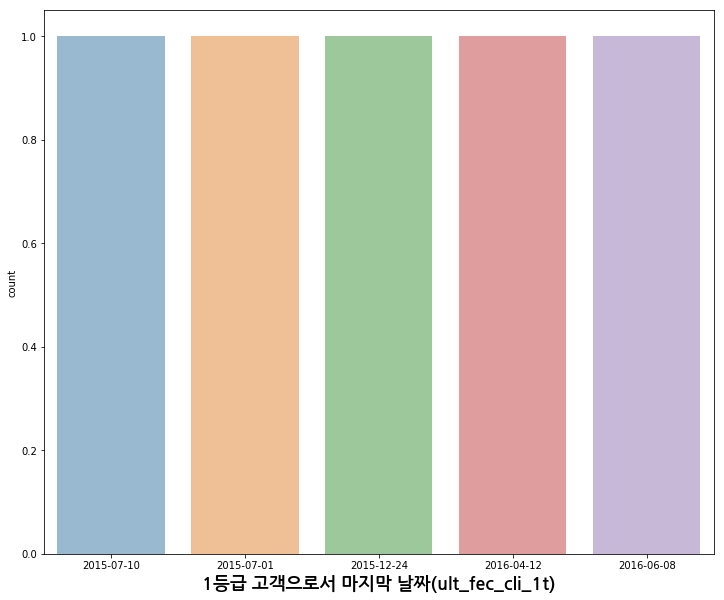

----------------------------------------------------------------------------------------------------
col : 거주 지표(indresi)


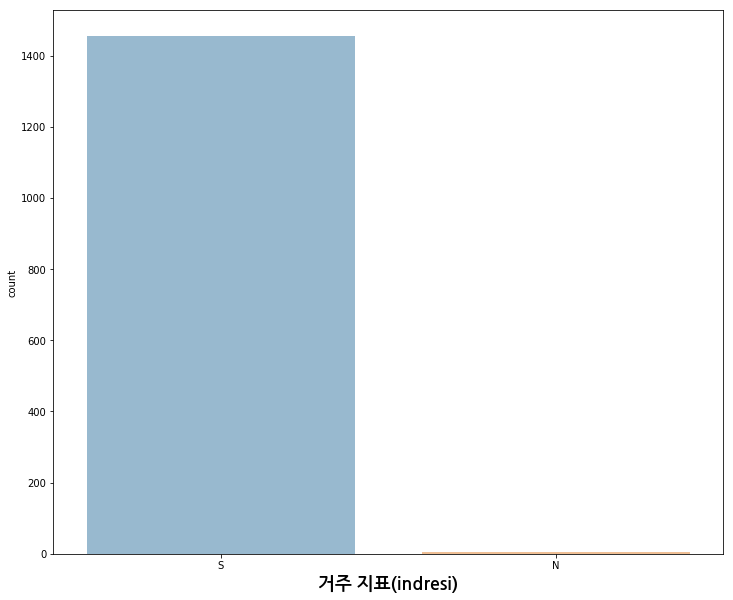

----------------------------------------------------------------------------------------------------
col : 고객 거주 국가(pais_residencia)


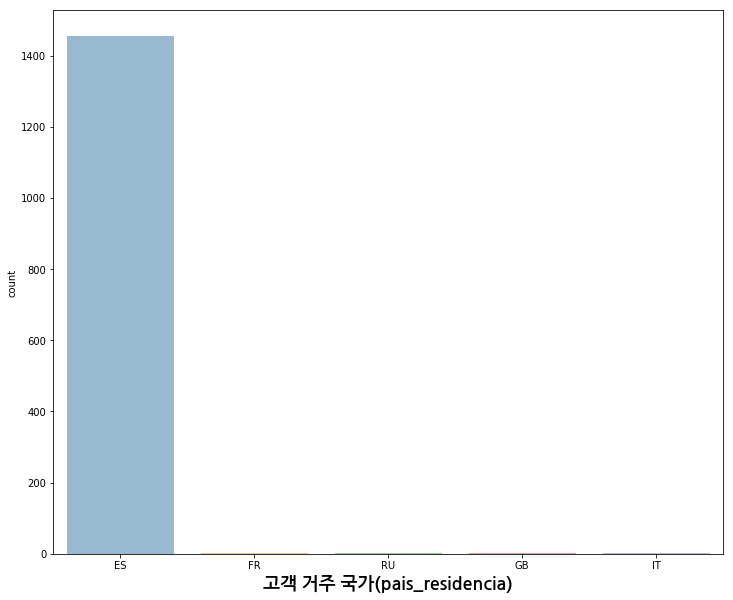

----------------------------------------------------------------------------------------------------
col : 고객 등급(indrel)


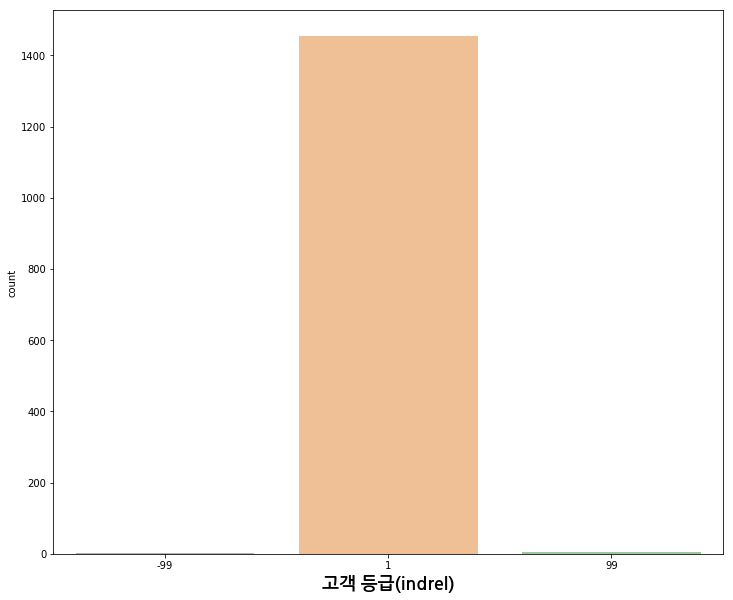

----------------------------------------------------------------------------------------------------
col : 고객 사망 여부(indfall)


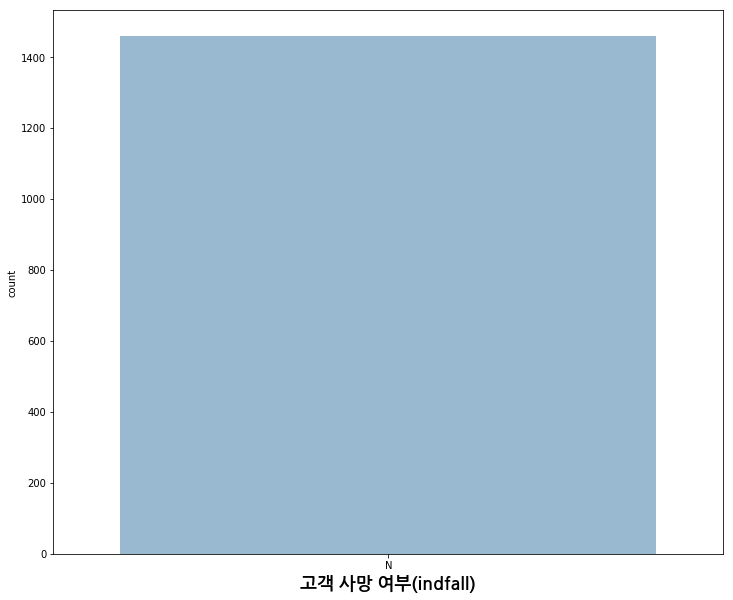

----------------------------------------------------------------------------------------------------
col : 고객 유입 채널(canal_entrada)


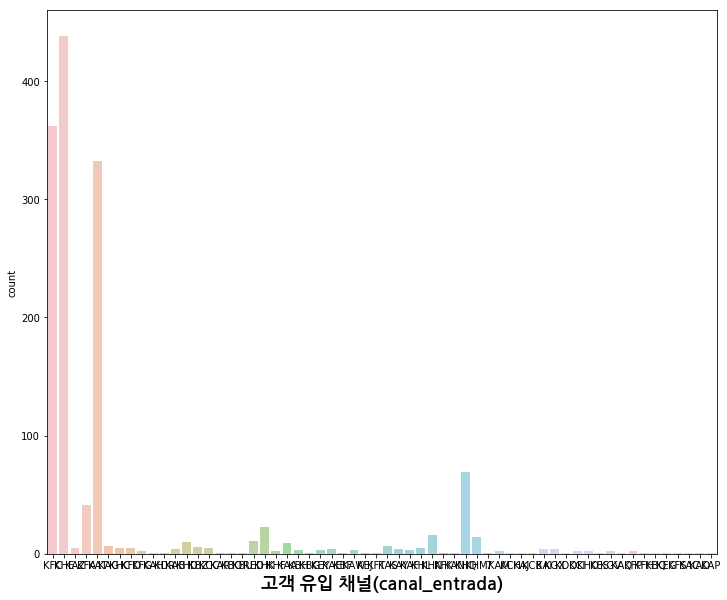

----------------------------------------------------------------------------------------------------
col : 고객&은행 간 첫 계약 체결 날짜(fecha_alta)


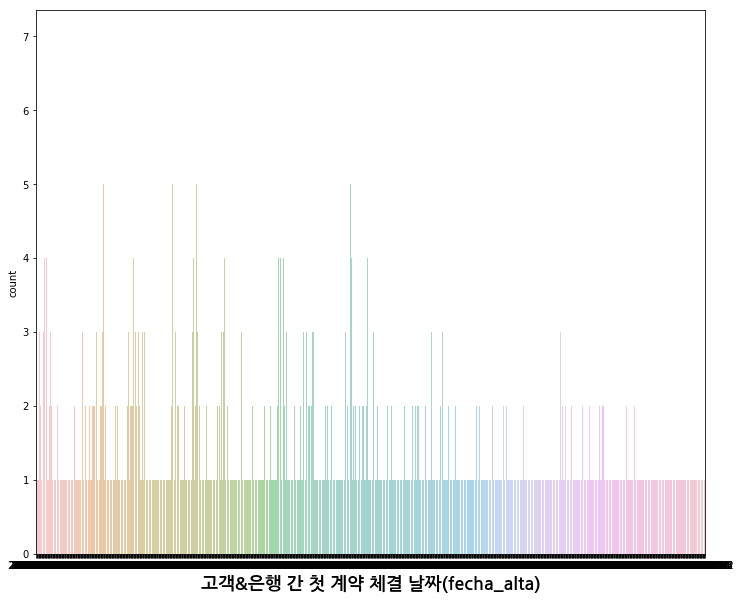

----------------------------------------------------------------------------------------------------
col : 고용 지표(ind_empleado)


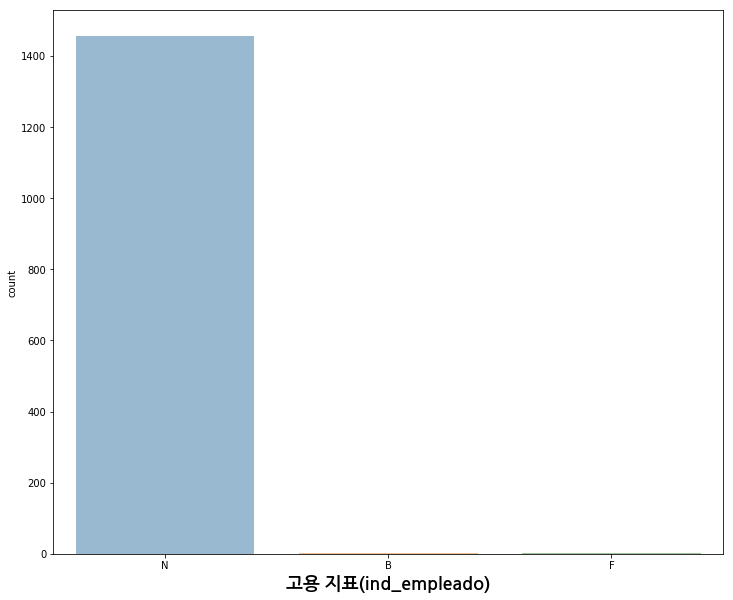

----------------------------------------------------------------------------------------------------
col : 나이(age)


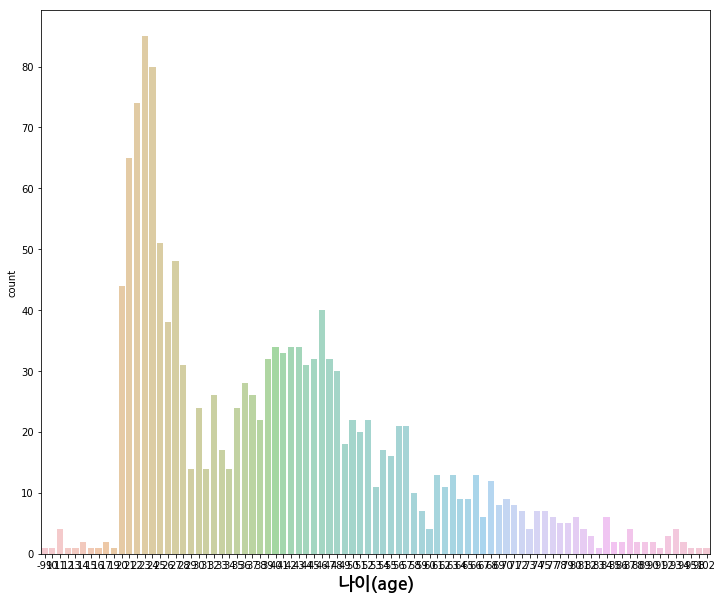

----------------------------------------------------------------------------------------------------
col : 날짜(fecha_dato)


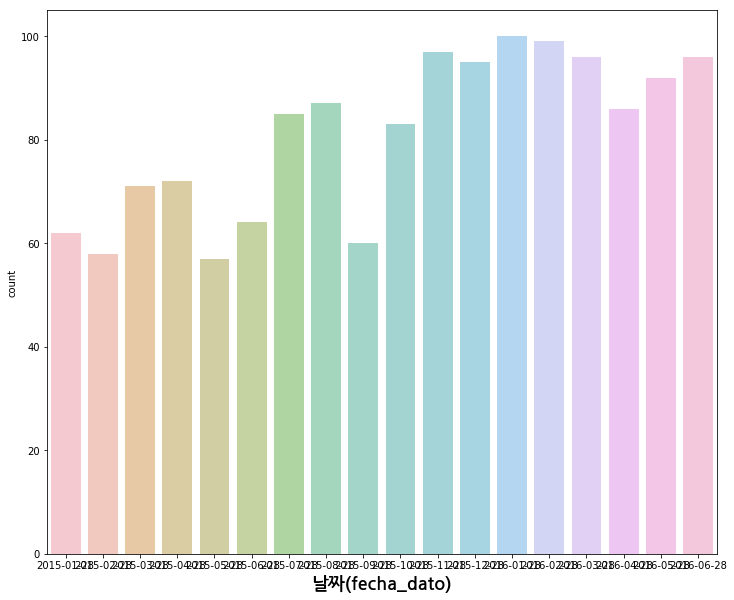

----------------------------------------------------------------------------------------------------
col : 배우자 지표(conyuemp)


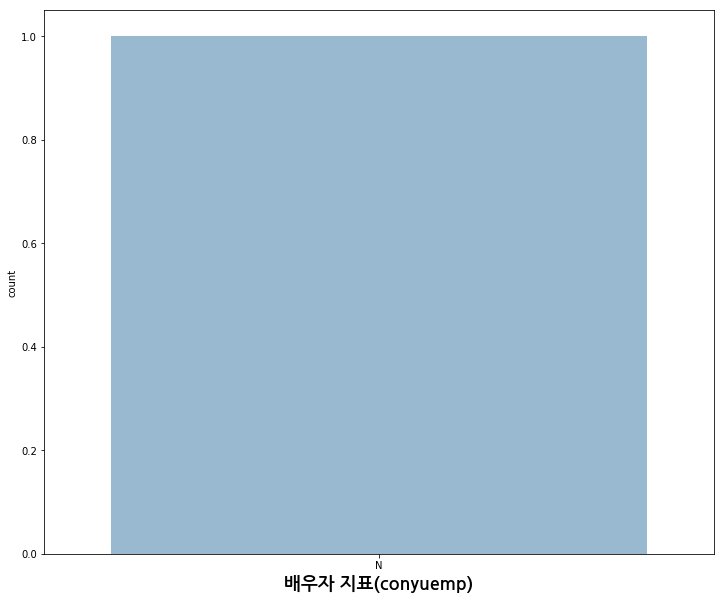

----------------------------------------------------------------------------------------------------
col : 분류(segmento)


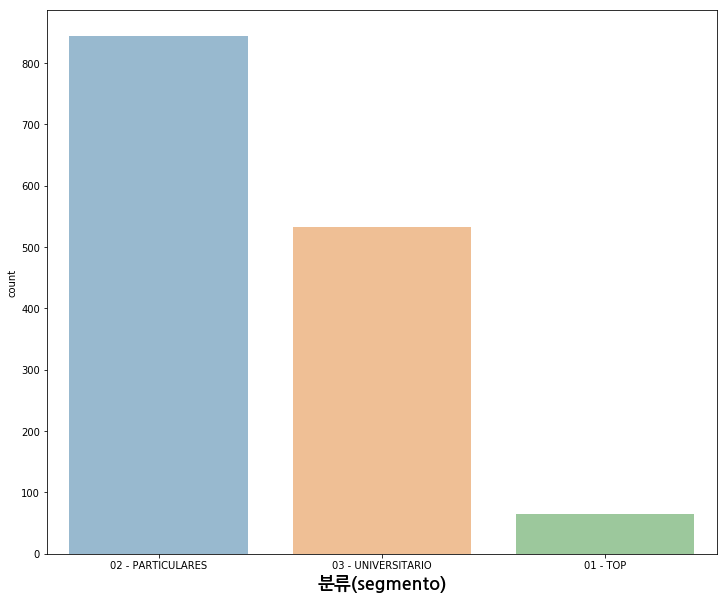

----------------------------------------------------------------------------------------------------
col : 성별(sexo)


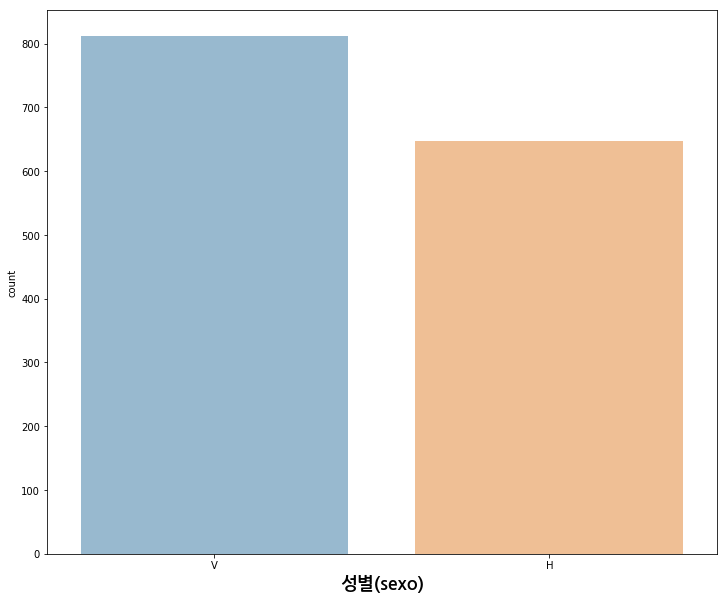

----------------------------------------------------------------------------------------------------
col : 신규 고객 지표(ind_nuevo)


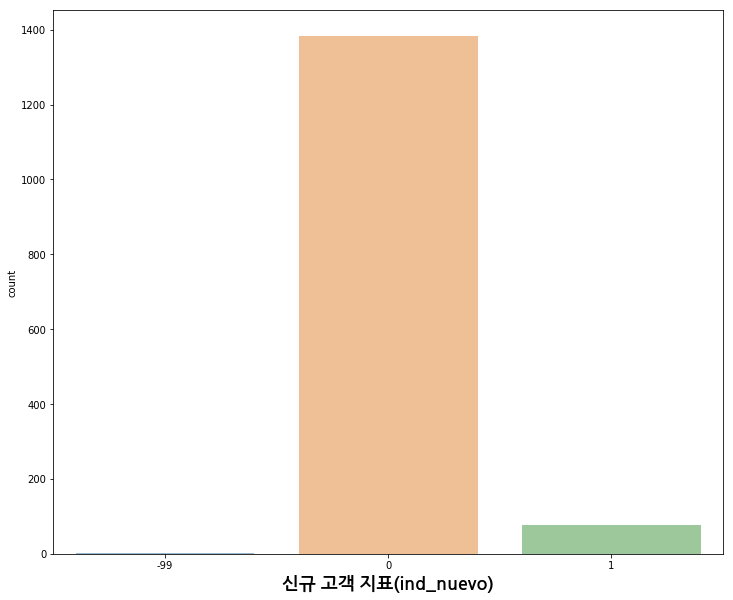

----------------------------------------------------------------------------------------------------
col : 외국인 지표(indext)


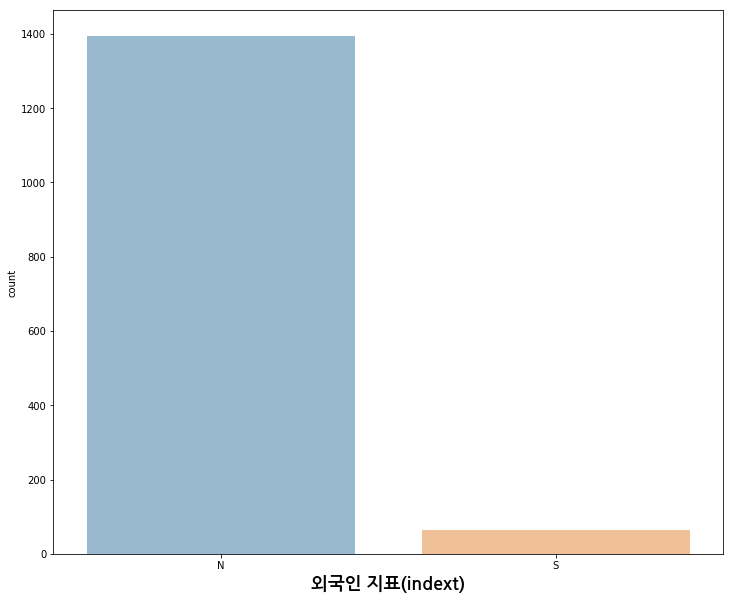

----------------------------------------------------------------------------------------------------
col : 월초 기준 고객 관계 유형(tiprel_1mes)


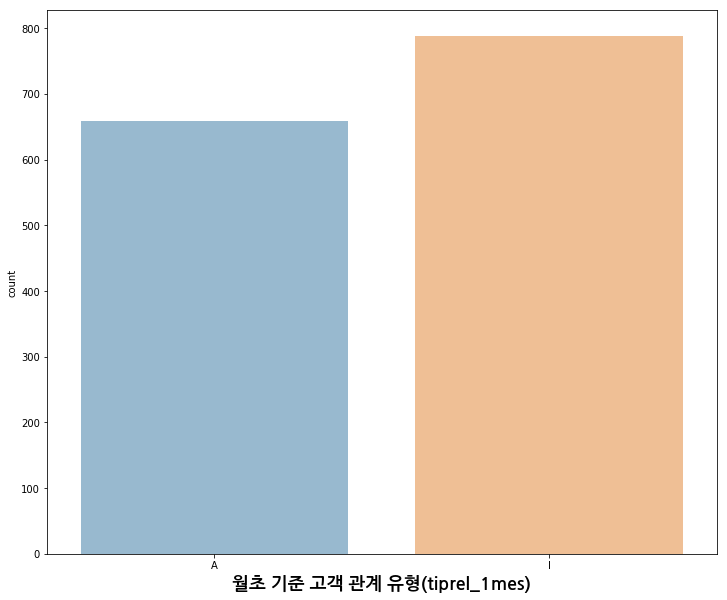

----------------------------------------------------------------------------------------------------
col : 월초 기준 고객 등급(indrel_1mes)


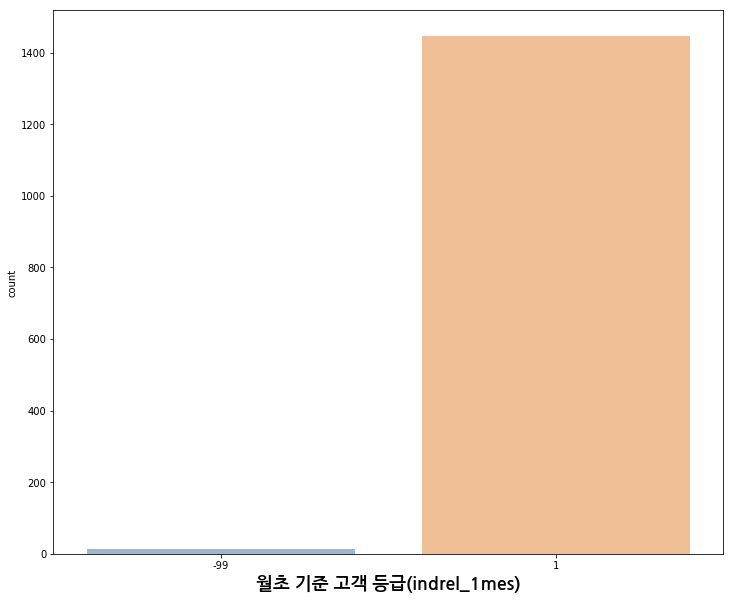

----------------------------------------------------------------------------------------------------
col : 은행 거래 누적 기간(antiguedad)


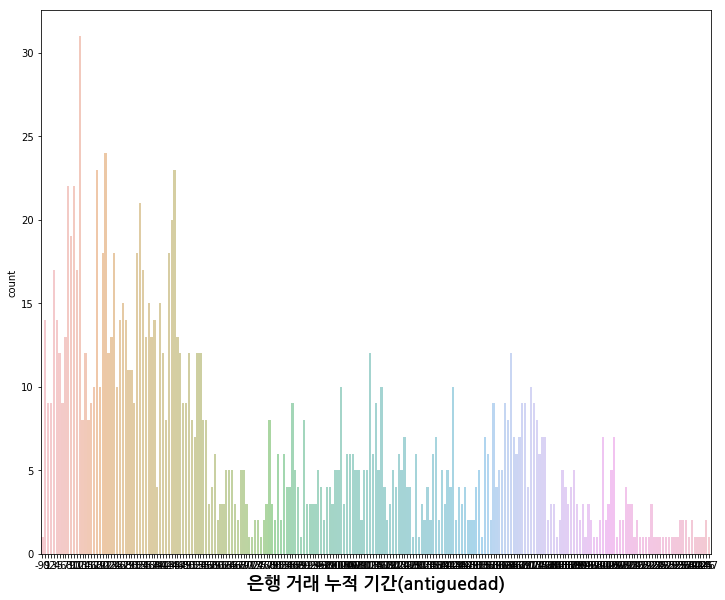

----------------------------------------------------------------------------------------------------
col : 주소 유형(tipodom)


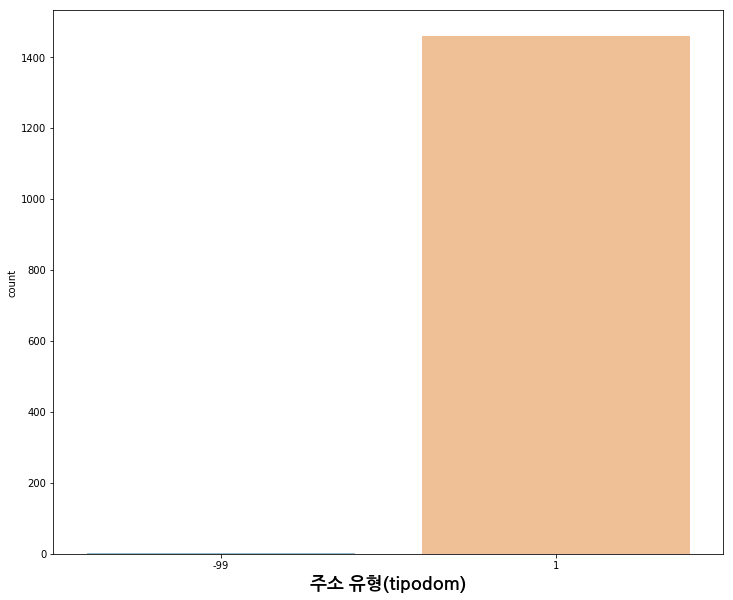

----------------------------------------------------------------------------------------------------
col : 지방 이름(nomprov)


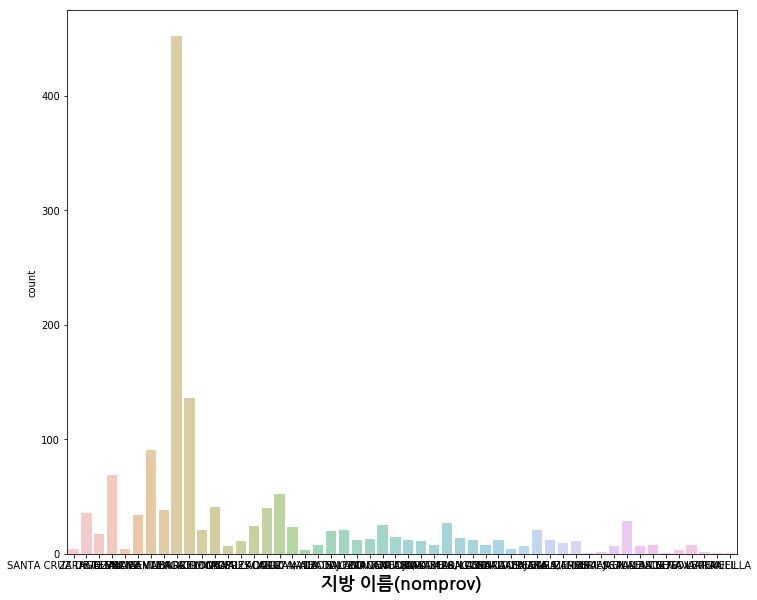

----------------------------------------------------------------------------------------------------
col : 지방 코드(cod_prov)


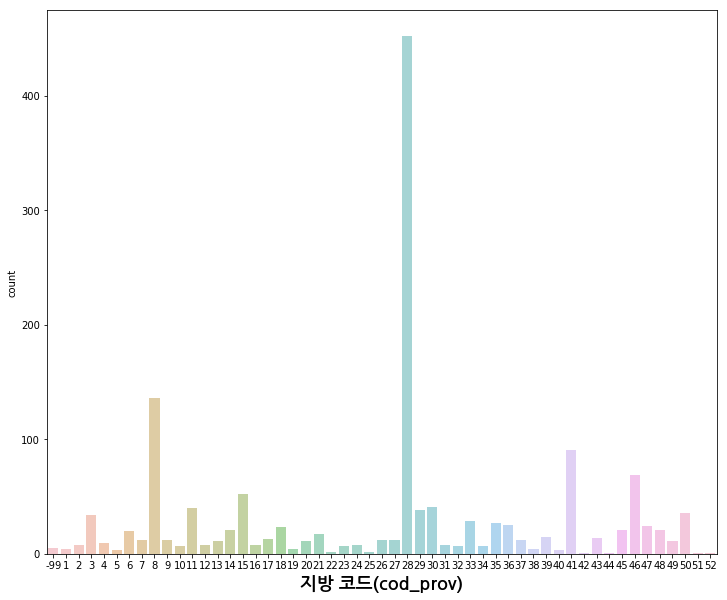

----------------------------------------------------------------------------------------------------
col : 활발성 지표(ind_actividad_cliente)


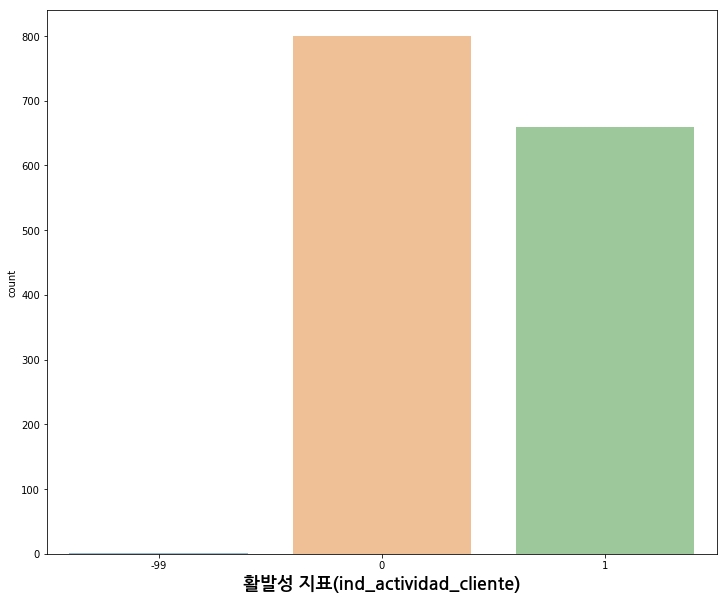

In [42]:
skip_column_because_to_many_variables = ['고객 고유식별번호(ncodpers)','가구 총 수입(renta)']
for col in X_columns :
    if col in skip_column_because_to_many_variables :
        continue
    print('-' *100)
    print('col :', col)
    
    f, ax = plt.subplots(figsize=(12,10))
    sns.countplot(x=col, data=df, alpha=0.5)
    #plt.title(col + 'Conut Plot', fontproperties=fontprop)
    plt.xlabel(col, fontproperties=fontprop)
    plt.show()

#### b) Time Series Data Visualization

In [50]:
# Time Series Data Visualization

# 날짜 데이터를 기준으로 분석하기 위하여, 날짜 데이터를 별도로 추출한다.
months = df_train["날짜(fecha_dato)"].unique().tolist()

label_cols = y_columns

label_over_time = []
for i in range(len(label_cols)):
    # 매월, 각 제품의 총합을 groupby(..).agg('sum')으로 계산하여 label_sum 에 저장한다.
    label_sum = df_train.groupby(["날짜(fecha_dato)"])[label_cols[i]].agg('sum')
    label_over_time.append(label_sum.tolist())

print(label_over_time)

[[3, 1, 7, 11, 2, 6, 7, 11, 0, 4, 9, 6, 6, 6, 10, 4, 3], [8, 5, 10, 6, 1, 3, 10, 7, 4, 2, 6, 6, 5, 5, 8, 5, 9], [4.0, 2.0, 7.0, 6.0, 0.0, 1.0, 9.0, 6.0, 1.0, 2.0, 2.0, 3.0, 3.0, 5.0, 5.0, 4.0, 5.0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [45, 46, 56, 53, 47, 50, 52, 57, 33, 57, 57, 56, 63, 64, 51, 53, 55], [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0], [0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], [2, 5, 4, 6, 3, 3, 4, 6, 4, 5, 3, 7, 4, 4, 3, 3, 2], [3, 2, 2, 6, 1, 4, 4, 6, 4, 1, 2, 3, 2, 1, 0, 3, 8], [0, 0, 3, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 1, 2], [5.0, 2.0, 7.0, 6.0, 0.0, 1.0, 9.0, 6.0, 2.0, 2.0, 4.0, 4.0, 3.0, 5.0, 5.0, 5.0, 6.0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 3, 7, 2, 4, 5, 3, 7, 2, 2, 5, 6, 1, 5, 3, 5, 2], [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [2, 1, 4, 4, 2, 1, 4, 3, 1, 1, 2, 3, 0, 2, 1, 1, 2], [14, 7, 

[array([110.,  90., 142., 133.,  77.,  98., 137., 133.,  72.,  97., 115.,
       127., 119., 128., 113., 120., 118.]), array([107.,  89., 135., 122.,  75.,  92., 130., 122.,  72.,  93., 106.,
       121., 113., 122., 103., 116., 115.]), array([ 99.,  84., 125., 116.,  74.,  89., 120., 115.,  68.,  91., 100.,
       115., 108., 117.,  95., 111., 106.]), array([ 95.,  82., 118., 110.,  74.,  88., 111., 109.,  67.,  89.,  98.,
       112., 105., 112.,  90., 107., 101.]), array([ 95.,  82., 118., 110.,  74.,  88., 111., 109.,  67.,  89.,  98.,
       112., 105., 112.,  90., 107., 101.]), array([50., 36., 62., 57., 27., 38., 59., 52., 34., 32., 41., 56., 42.,
       48., 39., 54., 46.]), array([50., 36., 62., 57., 26., 38., 59., 52., 33., 32., 41., 56., 41.,
       48., 39., 53., 46.]), array([50., 34., 62., 57., 25., 38., 59., 51., 33., 32., 40., 55., 41.,
       47., 38., 52., 45.]), array([50., 34., 62., 57., 25., 38., 59., 51., 33., 32., 40., 55., 41.,
       47., 38., 52., 45.]), array

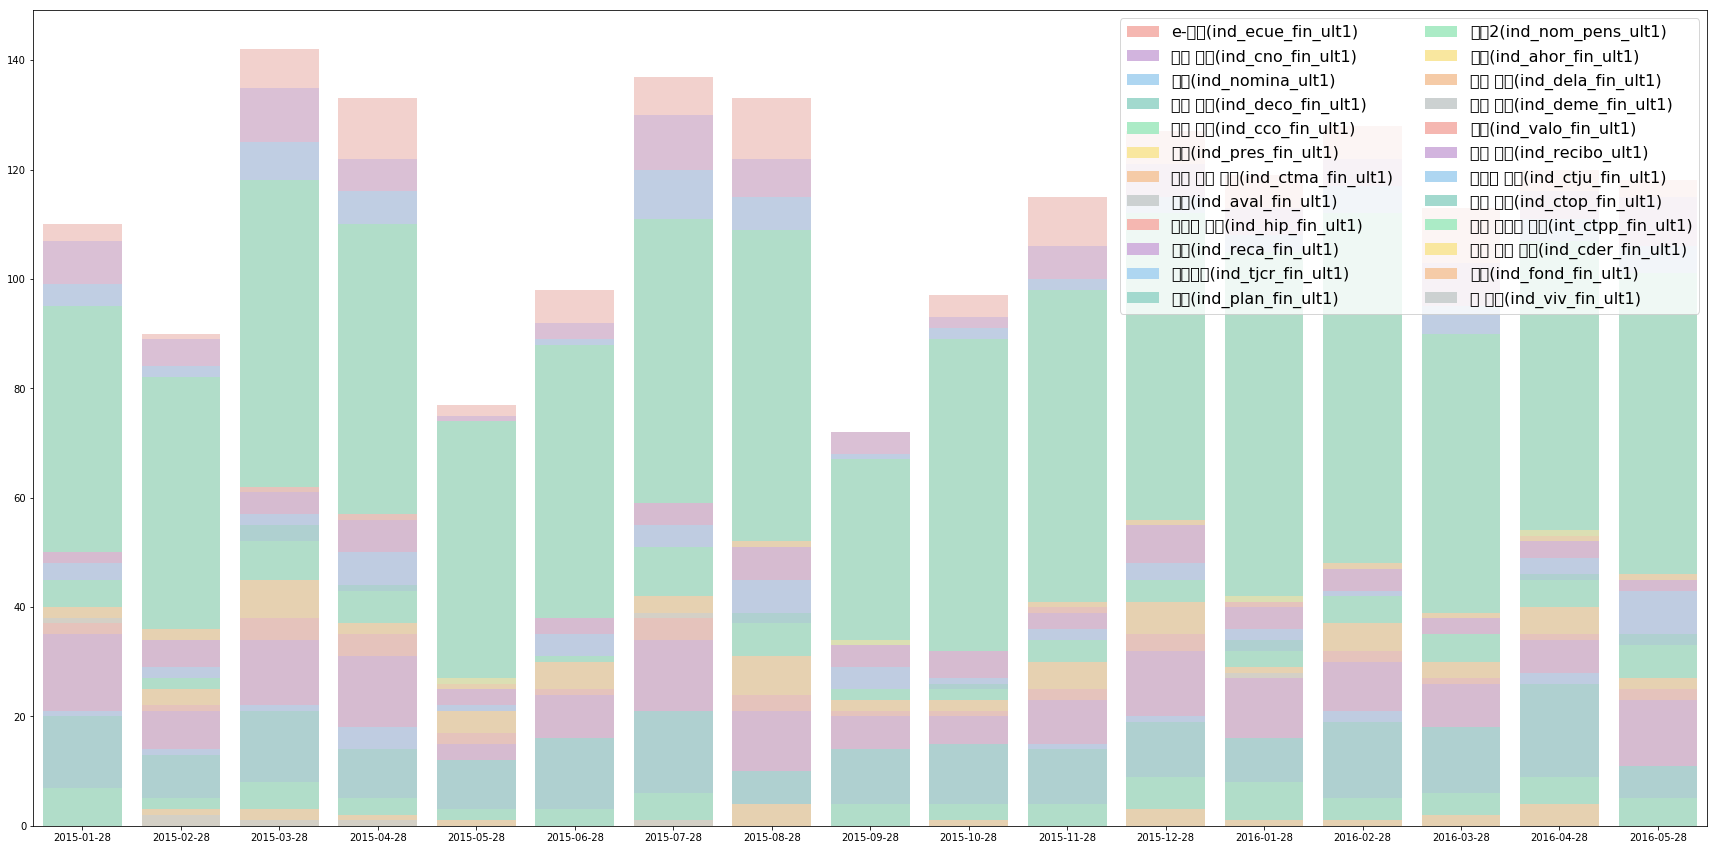

In [71]:
# 월별 금융 제품 보유 데이터를 누적 막대그래프로 시각화 (누적 증가 확인)
label_sum_over_time = []
for i in range(len(label_cols)):
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))
print(label_sum_over_time)

# 누적 막대 그래프를 시각화하기 위해 n번째 제품의 총합을 1~n번째 제품의 총합으로 만든다.
color_list = ['#F5B7B1', '#D2B4DE', '#AED6F1', '#A2D9CE', '#ABEBC6', '#F9E79F', '#F5CBA7', '#CCD1D1']

f, ax = plt.subplots(figsize=(30,15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_over_time[i], color = color_list[i%8], alpha=0.7)
plt.legend(
    [plt.Rectangle((0,0),1,1,fc = color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))],
    label_cols,
    loc=1,
    ncol=2,
    prop={'size':16}
)

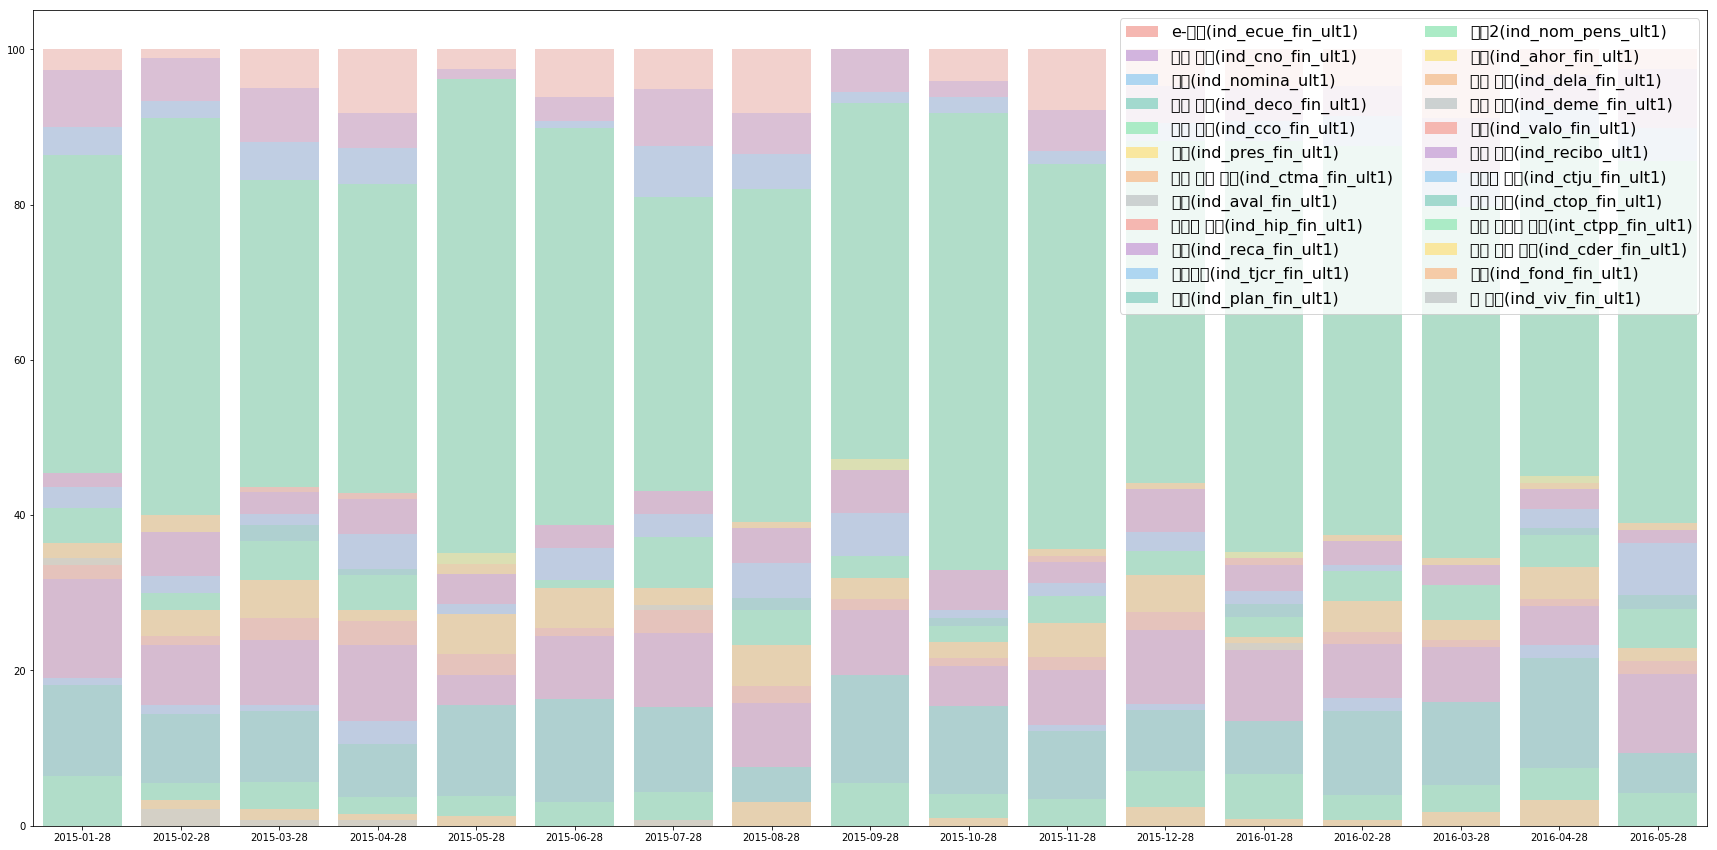

In [72]:
# 월별 금융 제품 보유 데이터를 누적 막대그래프로 시각화 (상대 증가 확인)

label_sum_percent = (label_sum_over_time / (1.*np.asarray(label_sum_over_time).max(axis=0))) *100 

#asarray -> input 을 array 로 변환
color_list = ['#F5B7B1', '#D2B4DE', '#AED6F1', '#A2D9CE', '#ABEBC6', '#F9E79F', '#F5CBA7', '#CCD1D1']

f, ax = plt.subplots(figsize=(30,15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_percent[i], color = color_list[i%8], alpha=0.7)
plt.legend(
    [plt.Rectangle((0,0),1,1,fc = color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))],
    label_cols,
    loc=1,
    ncol=2,
    prop={'size':16})
    

## 4. Feature Engineering

### 1) Extract Y/M from Time Series Columns

In [100]:
df['고객&은행 간 첫 계약 체결 날짜(fecha_alta)_month'] = df['고객&은행 간 첫 계약 체결 날짜(fecha_alta)'].map(lambda x : 0.0 if x.__class__ is float else float(x.split('-')[1])).astype(np.int8)
df['고객&은행 간 첫 계약 체결 날짜(fecha_alta)_year'] = df['고객&은행 간 첫 계약 체결 날짜(fecha_alta)'].map(lambda x : 0.0 if x.__class__ is float else float(x.split('-')[0])).astype(np.int16)

df['1등급 고객으로서 마지막 날짜(ult_fec_cli_1t)_month'] = df['1등급 고객으로서 마지막 날짜(ult_fec_cli_1t)'].map(lambda x : 0.0 if x.__class__ is float else float(x.split('-')[1])).astype(np.int8)
df['1등급 고객으로서 마지막 날짜(ult_fec_cli_1t)_year'] = df['1등급 고객으로서 마지막 날짜(ult_fec_cli_1t)'].map(lambda x : 0.0 if x.__class__ is float else float(x.split('-')[0])).astype(np.int16)

In [101]:
df.shape

(1460, 52)

### 2) Make Time Lag Data

In [102]:
# 1) 제품 변수를 list 형태로 저장
products = y_columns

# 2) 날짜를 숫자로 변환하는 함수 선언
def date_to_int(str_date):
    Y, M, D = [int(a) for a in str_date.strip().split("-")]
    int_date = (int(Y) - 2015) * 12 + int(M)
    return int_date

df['int_date'] = df['날짜(fecha_dato)'].map(date_to_int).astype(np.int8)

# 3) int_date 에 1을 더하여 lag를 생성하고, 변수명에 _prev 를 추가

df_lag = df.copy()
df_lag.columns = [col + '_prev' if col not in ['int_date', '고객 고유식별번호(ncodpers)'] else col for col in df.columns]
df_lag['int_date'] += 1

# 4) 원본 데이터와 lag 데이터를 '날짜(fecha_dato)', '고객 고유식별번호(ncodpers)' 기준으로 합친다. 
#    lag 데이터의 int_date 는 1 밀려있기 때문에 저번달의 제품 정보가 삽입된다.

df = df.merge(df_lag, on = ['int_date', '고객 고유식별번호(ncodpers)'], how = 'left')

# 5) 메모리 효율을 위해 불필요 변수 제거
del df_lag

# 6) 저번 달의 제품 정보가 존재 하지 않을 경우를 대비하여 0으로 대체
for prod in products :
    prev = prod + '_prev'
    df[prev].fillna(0, inplace=True)

df.fillna(-99, inplace=True)

In [103]:
df.head()

1등급 고객으로서 마지막 날짜(ult_fec_cli_1t)  e-계정(ind_ecue_fin_ult1)  가구 총 수입(renta)  \
0                              -99                      0.0        65166.54   
1                              -99                      0.0       169512.51   
2                              -99                      0.0          -99.00   
3                              -99                      0.0          -99.00   
4                              -99                      0.0          -99.00   

  거주 지표(indresi) 고객 거주 국가(pais_residencia)  고객 고유식별번호(ncodpers)  \
0              S                        ES              1055198   
1              S                        ES              1048106   
2              S                        ES              1027002   
3              S                        ES              1098575   
4              S                        ES              1127288   

   고객 등급(indrel) 고객 사망 여부(indfall) 고객 유입 채널(canal_entrada)  \
0            1.0                 N                     KFC   
1            1.0                 N                     KHE   
2            1.0                 N                     KHE   
3            1.0                 N                     KHE   
4            1.0                 N                     KFC   

  고객&은행 간 첫 계약 체결 날짜(fecha_alta) 고용 지표(ind_empleado)  급여 계정(ind_cno_fin_ult1)  \
0                     2012-08-31                   N                      1.0   
1                     2012-08-09                   N                      0.0   
2                     2012-07-20                   N                      0.0   
3                     2012-11-12                   N                      0.0   
4                     2013-04-09                   N                      0.0   

   급여(ind_nomina_ult1)  나이(age) 날짜(fecha_dato)  단기 예금(ind_deco_fin_ult1)  \
0                  1.0     32.0     2015-01-28                       0.0   
1                  0.0     23.0     2015-01-28                       0.0   
2                  0.0     25.0     2015-01-28                       0.0   
3                  0.0     29.0     2015-01-28                       0.0   
4                  0.0     41.0     2015-01-28                       0.0   

   당좌 예금(ind_cco_fin_ult1)  대출(ind_pres_fin_ult1)  \
0                      0.0                    0.0   
1                      1.0                    0.0   
2                      1.0                    0.0   
3                      1.0                    0.0   
4                      0.0                    0.0   

   마스 특별 계정(ind_ctma_fin_ult1) 배우자 지표(conyuemp)  보증(ind_aval_fin_ult1)  \
0                          0.0              -99                    0.0   
1                          0.0              -99                    0.0   
2                          0.0              -99                    0.0   
3                          0.0              -99                    0.0   
4                          0.0              -99                    0.0   

   부동산 대출(ind_hip_fin_ult1)        분류(segmento) 성별(sexo)  \
0                       0.0   02 - PARTICULARES        V   
1                       0.0  03 - UNIVERSITARIO        V   
2                       0.0  03 - UNIVERSITARIO        H   
3                       0.0  03 - UNIVERSITARIO        V   
4                       0.0   02 - PARTICULARES        H   

   세금(ind_reca_fin_ult1)  ...  연금(ind_plan_fin_ult1)_prev  \
0                    0.0  ...                         0.0   
1                    0.0  ...                         0.0   
2                    0.0  ...                         0.0   
3                    0.0  ...                         0.0   
4                    0.0  ...                         0.0   

   연금2(ind_nom_pens_ult1)_prev  예금(ind_ahor_fin_ult1)_prev  \
0                          0.0                         0.0   
1                          0.0                         0.0   
2                          0.0                         0.0   
3                          0.0                         0.0   
4    

### 3) One Hot Encoding

In [107]:
df_num = df.select_dtypes(exclude=['object'])
df_cat = df.select_dtypes(include=['object'])
df_cat_one_hot = pd.get_dummies(df_cat)
df_total = pd.concat([df_num, df_cat_one_hot], axis=1)
df_total.shape

(1460, 1370)

In [108]:
df_total.head()

e-계정(ind_ecue_fin_ult1)  가구 총 수입(renta)  고객 고유식별번호(ncodpers)  \
0                      0.0        65166.54              1055198   
1                      0.0       169512.51              1048106   
2                      0.0          -99.00              1027002   
3                      0.0          -99.00              1098575   
4                      0.0          -99.00              1127288   

   고객 등급(indrel)  급여 계정(ind_cno_fin_ult1)  급여(ind_nomina_ult1)  나이(age)  \
0            1.0                      1.0                  1.0     32.0   
1            1.0                      0.0                  0.0     23.0   
2            1.0                      0.0                  0.0     25.0   
3            1.0                      0.0                  0.0     29.0   
4            1.0                      0.0                  0.0     41.0   

   단기 예금(ind_deco_fin_ult1)  당좌 예금(ind_cco_fin_ult1)  대출(ind_pres_fin_ult1)  \
0                       0.0                      0.0                    0.0   
1                       0.0                      1.0                    0.0   
2                       0.0                      1.0                    0.0   
3                       0.0                      1.0                    0.0   
4                       0.0                      0.0                    0.0   

   마스 특별 계정(ind_ctma_fin_ult1)  보증(ind_aval_fin_ult1)  \
0                          0.0                    0.0   
1                          0.0                    0.0   
2                          0.0                    0.0   
3                          0.0                    0.0   
4                          0.0                    0.0   

   부동산 대출(ind_hip_fin_ult1)  세금(ind_reca_fin_ult1)  신규 고객 지표(ind_nuevo)  \
0                       0.0                    0.0                  0.0   
1                       0.0                    0.0                  0.0   
2                       0.0                    0.0                  0.0   
3                       0.0                    0.0                  0.0   
4                       0.0                    0.0                  0.0   

   신용카드(ind_tjcr_fin_ult1)  연금(ind_plan_fin_ult1)  연금2(ind_nom_pens_ult1)  \
0                      0.0                    0.0                     1.0   
1                      0.0                    0.0                     0.0   
2                      0.0                    0.0                     0.0   
3                      0.0                    0.0                     0.0   
4                      0.0                    0.0                     0.0   

   예금(ind_ahor_fin_ult1)  월초 기준 고객 등급(indrel_1mes)  은행 거래 누적 기간(antiguedad)  \
0                    0.0                       1.0                     34.0   
1                    0.0                       1.0                     35.0   
2                    0.0                       1.0                     36.0   
3                    0.0                       1.0                     32.0   
4                    0.0                       1.0                     27.0   

   장기 예금(ind_dela_fin_ult1)  주소 유형(tipodom)  중기 예금(ind_deme_fin_ult1)  \
0                       0.0             1.0                       0.0   
1                       0.0             1.0                       0.0   
2                       0.0             1.0                       0.0   
3                       0.0             1.0                       0.0   
4                       1.0             1.0                       0.0   

   증권(ind_valo_fin_ult1)  ...  지방 이름(nomprov)_ZARAGOZA  \
0                    0.0  ...                        0   
1                    0.0  ...                        1   
2                    0.0  ...                        0   
3                    0.0  ...                        0   
4                    0.0  ...                        0   

   거주 지표(indresi)_prev_-99  거주 지표(indresi)_prev_S  \
0                        1                      0   
1                        1                      

## 5. Modeling

### 1) Divide into Train / Validation / Test Data SET

In [104]:
df_train.shape, df_test.shape, df.shape

((1364, 48), (96, 24), (1460, 104))

In [109]:
trn_val = df_total[df_total.index < 1364]
trn_val.shape

(1364, 1370)

In [110]:
tst = df_total[df_total.index >= 1364]
tst.shape

(96, 1370)

In [112]:
trn_val_y = trn_val[y_columns]
trn_val_y.shape

(1364, 24)

In [113]:
trn_val_y.head()

e-계정(ind_ecue_fin_ult1)  급여 계정(ind_cno_fin_ult1)  급여(ind_nomina_ult1)  \
0                      0.0                      1.0                  1.0   
1                      0.0                      0.0                  0.0   
2                      0.0                      0.0                  0.0   
3                      0.0                      0.0                  0.0   
4                      0.0                      0.0                  0.0   

   단기 예금(ind_deco_fin_ult1)  당좌 예금(ind_cco_fin_ult1)  대출(ind_pres_fin_ult1)  \
0                       0.0                      0.0                    0.0   
1                       0.0                      1.0                    0.0   
2                       0.0                      1.0                    0.0   
3                       0.0                      1.0                    0.0   
4                       0.0                      0.0                    0.0   

   마스 특별 계정(ind_ctma_fin_ult1)  보증(ind_aval_fin_ult1)  \
0                          0.0                    0.0   
1                          0.0                    0.0   
2                          0.0                    0.0   
3                          0.0                    0.0   
4                          0.0                    0.0   

   부동산 대출(ind_hip_fin_ult1)  세금(ind_reca_fin_ult1)  신용카드(ind_tjcr_fin_ult1)  \
0                       0.0                    0.0                      0.0   
1                       0.0                    0.0                      0.0   
2                       0.0                    0.0                      0.0   
3                       0.0                    0.0                      0.0   
4                       0.0                    0.0                      0.0   

   연금(ind_plan_fin_ult1)  연금2(ind_nom_pens_ult1)  예금(ind_ahor_fin_ult1)  \
0                    0.0                     1.0                    0.0   
1                    0.0                     0.0                    0.0   
2                    0.0                     0.0                    0.0   
3                    0.0                     0.0                    0.0   
4                    0.0                     0.0                    0.0   

   장기 예금(ind_dela_fin_ult1)  중기 예금(ind_deme_fin_ult1)  증권(ind_valo_fin_ult1)  \
0                       0.0                       0.0                    0.0   
1                       0.0                       0.0                    0.0   
2                       0.0                       0.0                    0.0   
3                       0.0                       0.0                    0.0   
4                       1.0                       0.0                    0.0   

   직불 카드(ind_recibo_ult1)  청소년 계정(ind_ctju_fin_ult1)  \
0                     1.0                        0.0   
1                     0.0                        0.0   
2                     0.0                        0.0   
3                     0.0                        0.0   
4                     0.0                        0.0   

   특정 계정(ind_ctop_fin_ult1)  특정 플러스 계정(int_ctpp_fin_ult1)  \
0                       0.0                           0.0   
1                       0.0                           0.0   
2                       0.0                           0.0   
3                       0.0                           0.0   
4                       0.0                           0.0   

   파생 상품 계좌(ind_cder_fin_ult1)  펀드(ind_fond_fin_ult1)  홈 계정(ind_viv_fin_ult1)  
0                          0.0                    0.0                     0.0  
1                          0.0                    0.0                     0.0  
2                          0.0                    0.0                     0.0  
3                          0.0                    0.0                     0.0  
4                          0.0                    0.0                     0.0

In [114]:
trn_val_X = trn_val.drop(columns=y_columns)
trn_val_X.shape

(1364, 1346)

In [116]:
trn_val_X.head()

가구 총 수입(renta)  고객 고유식별번호(ncodpers)  고객 등급(indrel)  나이(age)  \
0        65166.54              1055198            1.0     32.0   
1       169512.51              1048106            1.0     23.0   
2          -99.00              1027002            1.0     25.0   
3          -99.00              1098575            1.0     29.0   
4          -99.00              1127288            1.0     41.0   

   신규 고객 지표(ind_nuevo)  월초 기준 고객 등급(indrel_1mes)  은행 거래 누적 기간(antiguedad)  \
0                  0.0                       1.0                     34.0   
1                  0.0                       1.0                     35.0   
2                  0.0                       1.0                     36.0   
3                  0.0                       1.0                     32.0   
4                  0.0                       1.0                     27.0   

   주소 유형(tipodom)  지방 코드(cod_prov)  활발성 지표(ind_actividad_cliente)  \
0             1.0             38.0                            1.0   
1             1.0             50.0                            0.0   
2             1.0             21.0                            0.0   
3             1.0             46.0                            0.0   
4             1.0              1.0                            1.0   

   고객&은행 간 첫 계약 체결 날짜(fecha_alta)_month  고객&은행 간 첫 계약 체결 날짜(fecha_alta)_year  \
0                                     8                                 2012   
1                                     8                                 2012   
2                                     7                                 2012   
3                                    11                                 2012   
4                                     4                                 2013   

   1등급 고객으로서 마지막 날짜(ult_fec_cli_1t)_month  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   1등급 고객으로서 마지막 날짜(ult_fec_cli_1t)_year  int_date  \
0                                      0         1   
1                                      0         1   
2                                      0         1   
3                                      0         1   
4                                      0         1   

   1등급 고객으로서 마지막 날짜(ult_fec_cli_1t)_prev  e-계정(ind_ecue_fin_ult1)_prev  \
0                                    -99                           0.0   
1                                    -99                           0.0   
2                                    -99                           0.0   
3                                    -99                           0.0   
4                                    -99                           0.0   

   가구 총 수입(renta)_prev  고객 등급(indrel)_prev  급여 계정(ind_cno_fin_ult1)_prev  \
0                -99.0               -99.0                           0.0   
1                -99.0               -99.0                           0.0   
2                -99.0               -99.0                           0.0   
3                -99.0               -99.0                           0.0   
4                -99.0               -99.0                           0.0   

   급여(ind_nomina_ult1)_prev  나이(age)_prev  단기 예금(ind_deco_fin_ult1)_prev  \
0                       0.0         -99.0                            0.0   
1                       0.0         -99.0                            0.0   
2                       0.0         -99.0                            0.0   
3                       0.0         -99.0                            0.0   
4                       0.0         -99.0                            0.0   

   당좌 예금(ind_cco_fin_ult1)_prev  대출(ind_pres_fin_ult1)_prev  ...  \
0                           0.0                         0.0  ...   
1                           0.0                         0.0  ...   
2                           0.0                         0.0  ...   
3                   

In [117]:
tst_X = tst.drop(columns=y_columns)
tst_X.shape

(96, 1346)

In [118]:
tst_X.head()

가구 총 수입(renta)  고객 고유식별번호(ncodpers)  고객 등급(indrel)  나이(age)  \
1364        81958.65              1174853            1.0     23.0   
1365          -99.00              1172388            1.0     22.0   
1366          -99.00              1192920            1.0     47.0   
1367          -99.00              1189887            1.0     23.0   
1368       172948.05              1179372            1.0     23.0   

      신규 고객 지표(ind_nuevo)  월초 기준 고객 등급(indrel_1mes)  은행 거래 누적 기간(antiguedad)  \
1364                  0.0                       1.0                     33.0   
1365                  0.0                       1.0                     33.0   
1366                  0.0                       1.0                     32.0   
1367                  0.0                       1.0                     32.0   
1368                  0.0                       1.0                     33.0   

      주소 유형(tipodom)  지방 코드(cod_prov)  활발성 지표(ind_actividad_cliente)  \
1364             1.0             41.0                            1.0   
1365             1.0             12.0                            1.0   
1366             1.0             31.0                            0.0   
1367             1.0             50.0                            0.0   
1368             1.0             41.0                            0.0   

      고객&은행 간 첫 계약 체결 날짜(fecha_alta)_month  \
1364                                     9   
1365                                     9   
1366                                    10   
1367                                    10   
1368                                     9   

      고객&은행 간 첫 계약 체결 날짜(fecha_alta)_year  \
1364                                 2013   
1365                                 2013   
1366                                 2013   
1367                                 2013   
1368                                 2013   

      1등급 고객으로서 마지막 날짜(ult_fec_cli_1t)_month  \
1364                                       0   
1365                                       0   
1366                                       0   
1367                                       0   
1368                                       0   

      1등급 고객으로서 마지막 날짜(ult_fec_cli_1t)_year  int_date  \
1364                                      0        18   
1365                                      0        18   
1366                                      0        18   
1367                                      0        18   
1368                                      0        18   

      1등급 고객으로서 마지막 날짜(ult_fec_cli_1t)_prev  e-계정(ind_ecue_fin_ult1)_prev  \
1364                                    -99                           0.0   
1365                                    -99                           0.0   
1366                                    -99                           0.0   
1367                                    -99                           0.0   
1368                                    -99                           0.0   

      가구 총 수입(renta)_prev  고객 등급(indrel)_prev  급여 계정(ind_cno_fin_ult1)_prev  \
1364                -99.0               -99.0                           0.0   
1365                -99.0               -99.0                           0.0   
1366                -99.0               -99.0                           0.0   
1367                -99.0               -99.0                           0.0   
1368                -99.0               -99.0                           0.0   

      급여(ind_nomina_ult1)_prev  나이(age)_prev  단기 예금(ind_deco_fin_ult1)_prev  \
1364                       0.0         -99.0                            0.0   
1365                       0.0         -99.0                            0.0   
1366                       0.0         -99.0                            0.0   
1367                       0.0         -99.0                            0.0   
1368                       0.0         -99.0                            0.0   

      당좌 예금(ind_cco_fin_ult1)_prev  대출(ind_pres_fin_ult1)_prev  ...  \
1364         

In [122]:
X = trn_val_X.values
y = trn_val_y.values
X_test = tst_X.values

print(X.shape, y.shape, X_test.shape)

(1364, 1346) (1364, 24) (96, 1346)


In [143]:
tst_X.shape

(96, 1346)

### 2) Training 

In [147]:
i = 1

prediction_test_fold = []

kfold = KFold(n_splits=5, shuffle=True, random_state=2019)


param = {'booster' : 'gbtree',
         'max_depth' : 3,
         'nthread' : 4,
         'num_class' : len(y_columns),
         'objective' : 'multi:softprob',
         'silent' : 1,
         'eval_metric' : 'mlogloss',
         'eta' : 0.1,
         'min_child_weight' : 10,
         'colsample_bytree' : 0.8,
         'colsample_bylevel' : 0.9,
         'seed' : 2019}



for train_index, val_index in kfold.split(X) :
    print("Fold :", i)
    i+=1
    
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    

    print("Train Shape :", X_train.shape,
          "Validation Shape :", X_val.shape,
          "Test Shape :", X_test.shape)
    
    dtrn = xgb.DMatrix(X_train, label=y_train, feature_names = trn_val_X.columns)
    dval = xgb.DMatrix(X_val, label = y_val, feature_names = trn_val_X.columns)
    dtst = xgb.DMatrix(X_test, feature_names = trn_val_X.columns)
    
    xgb1 = xgb.train(param, dtrn, num_boost_round=100, evals = [(dtrn, 'train'), (dval, 'eval')], early_stopping_rounds = 20)
                 
    prediction = xgb1.predict(dtst)
    prediction_test_fold.append(prediction)

Fold : 1
Train Shape : (1091, 1346) Validation Shape : (273, 1346) Test Shape : (96, 1346)
[0]	train-mlogloss:2.19054	eval-mlogloss:2.17953
Multiple eval metrics have been passed: 'eval-mlogloss' will be used for early stopping.

Will train until eval-mlogloss hasn't improved in 20 rounds.
[1]	train-mlogloss:1.84829	eval-mlogloss:1.83468
[2]	train-mlogloss:1.61456	eval-mlogloss:1.60042
[3]	train-mlogloss:1.43676	eval-mlogloss:1.42182
[4]	train-mlogloss:1.2941	eval-mlogloss:1.2782
[5]	train-mlogloss:1.17529	eval-mlogloss:1.159
[6]	train-mlogloss:1.07429	eval-mlogloss:1.05898
[7]	train-mlogloss:0.987576	eval-mlogloss:0.973247
[8]	train-mlogloss:0.912083	eval-mlogloss:0.898476
[9]	train-mlogloss:0.845813	eval-mlogloss:0.832309
Fold : 2
Train Shape : (1091, 1346) Validation Shape : (273, 1346) Test Shape : (96, 1346)
[0]	train-mlogloss:2.19565	eval-mlogloss:2.19522
Multiple eval metrics have been passed: 'eval-mlogloss' will be used for early stopping.

Will train until eval-mlogloss hasn'

In [148]:
prediction_test_fold

[array([[0.49699438, 0.05919677, 0.02017313, ..., 0.02017313, 0.02017313,
         0.02017313],
        [0.49811274, 0.05707974, 0.02021852, ..., 0.02021852, 0.02021852,
         0.02021852],
        [0.48626944, 0.07949886, 0.0197378 , ..., 0.0197378 , 0.0197378 ,
         0.0197378 ],
        ...,
        [0.49353743, 0.0657407 , 0.02003281, ..., 0.02003281, 0.02003281,
         0.02003281],
        [0.49089897, 0.07073529, 0.01992572, ..., 0.01992572, 0.01992572,
         0.01992572],
        [0.49811274, 0.05707974, 0.02021852, ..., 0.02021852, 0.02021852,
         0.02021852]], dtype=float32),
 array([[0.48766577, 0.07023378, 0.02009548, ..., 0.02009548, 0.02009548,
         0.02009548],
        [0.50150514, 0.04384812, 0.02066576, ..., 0.02066576, 0.02066576,
         0.02066576],
        [0.5003194 , 0.04610872, 0.0206169 , ..., 0.0206169 , 0.0206169 ,
         0.0206169 ],
        ...,
        [0.4949819 , 0.05628499, 0.02039696, ..., 0.02039696, 0.02039696,
         0.02039696